# Projet de Machine Learning

Yasmine Boulkaid, Edda Ø. Iveland, Vilde Opdal and Laura K. Vázquez A.

INSA Toulouse, 2024

## Introduction

The objective of this project is to predict the variable Value-co2-emissions from the "Global Data on Sustainable Energy" dataset sourced from the KAGGLE competition website. We will achieve this by evaluating the performance of different machine learning regression methods. 

We will firstly get familiarized with the dataset and prepare it for the modelling stage, then explore different types of regression methods. After, we will compare the different methods used, and draw conclusions. Finally, we will impute the dataset with replacements for missing values and compare the performance of regression methods used on this new dataset.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
import scipy 

ModuleNotFoundError: No module named 'scipy'

Importing the dataset: 

In [11]:
path    = ''
data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

## Exploratory data analysis

### Question 1

In [12]:
# Here we show the first five lines of the data
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


At first glance we can already see that the data contains "NaN" values, for some variables more than others. We also see that it is necessary to convert 'Entity' and 'Year' to factorial data, this is the next thing we do. 

In [13]:
# Changing the type of qualitative variables into factors
data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True) # Changing the name of 'Density\\n(P/Km2)' to 'Density.n.P.Km2.'
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density.n.P.Km2.'].str.replace(',', '.'))

### Question 2

Further exploration of the amount of missing data

In [14]:
data_missing_value = data.isna().sum().sort_values(ascending=False)

print('Number of missing values = ', data_missing_value.sum())

Number of missing values =  6978


Cheching for duplicates in the data:

In [15]:
print("There are no duplicates in data? : ",data.duplicated().sum()==0)

There are no duplicates in data? :  True


In [16]:
# Checking which columns have missing values
isna_list = []
for col_name in data.columns:
    isna_list.append([col_name, data[col_name].isna().sum()])
isna_array = np.array(isna_list)

sorted_i = np.argsort(isna_array[:, 1].astype(int))[::-1]
sorted_i_array = isna_array[sorted_i]

#Printing the sorted list of missing values in the dataset
print(sorted_i_array) 

[['Renewables (% equivalent primary energy)' '2137']
 ['Financial flows to developing countries (US $)' '2089']
 ['Renewable-electricity-generating-capacity-per-capita' '931']
 ['Value_co2_emissions_kt_by_country' '428']
 ['gdp_growth' '317']
 ['gdp_per_capita' '282']
 ['Energy intensity level of primary energy (MJ/$2017 PPP GDP)' '207']
 ['Renewable energy share in the total final energy consumption (%)'
  '194']
 ['Access to clean fuels for cooking' '169']
 ['Electricity from nuclear (TWh)' '126']
 ['Low-carbon electricity (% electricity)' '42']
 ['Electricity from renewables (TWh)' '21']
 ['Electricity from fossil fuels (TWh)' '21']
 ['Access to electricity (% of population)' '10']
 ['Longitude' '1']
 ['Latitude' '1']
 ['Density.n.P.Km2.' '1']
 ['Land Area(Km2)' '1']
 ['Primary energy consumption per capita (kWh/person)' '0']
 ['Year' '0']
 ['Entity' '0']]


**Many variables have a big nuber of NA values in the current dataset, we therefore delete the following variables from the dataset:**

* Renewables (% equivalent primary energy)

* Financial flows to developing countries (US Dollars)

* Renewable-electricity-generating-capacity-per-capita


We were also asked to remove 'Electricity from fossil fuels (TWh)' since it is strongly correlated to the variable to explain. 


In [17]:
columns_to_remove = ["Financial flows to developing countries (US $)",
                     "Renewable-electricity-generating-capacity-per-capita",
                     "Renewables (% equivalent primary energy)",
                     'Electricity from fossil fuels (TWh)']

# reloading the dataset to avoide dobbel-running on the same dataset
data = pd.read_csv(path + "global-data-on-sustainable-energy (1).csv")

data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True)
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density.n.P.Km2.'].str.replace(',', '.'))

data = data.drop(columns=columns_to_remove)

# Print the new dataset
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


### Question 3

For the rest of this project, we decided to use a data set containing only individuals with no missing values. This leaves 2868 observations, which is verified below.

In [18]:
original_dimensions = data.shape
data0=data.copy()
data_complete = data.dropna()

# Printing old and new size of dataset
print("Original Dimensions:", original_dimensions)
print("New Dimensions:", data_complete.shape)

data = data_complete.copy()

data = data.reset_index()

Original Dimensions: (3649, 17)
New Dimensions: (2868, 17)


By removing lines from the dataset with missing data, we lose 781 observations. Although we are still left with a relatively large dataset, this is a large amount of data. Later in the project, we will investigate whether imputation of data can allow us to keep the original amount of data. 

As an example, we can se that we loose all observations for 2020 :

In [19]:
print("Number of obseravtions for 2020 in the dataset before dropping na : ", np.sum(data0["Year"]==2020))
print("Number of obseravtions for 2020 in the dataset after dropping na : ", np.sum(data["Year"]==2020))

Number of obseravtions for 2020 in the dataset before dropping na :  175
Number of obseravtions for 2020 in the dataset after dropping na :  0


### Question 4

We begin by unidimentional descriptive analysis of the data. Looking at the qualitative variables: Entity and Year, we notice that not every country has data from all the years between 2000 and 2020. To discover what countries are affected, we will generate a barplot of all the countries that are missing at least a year.

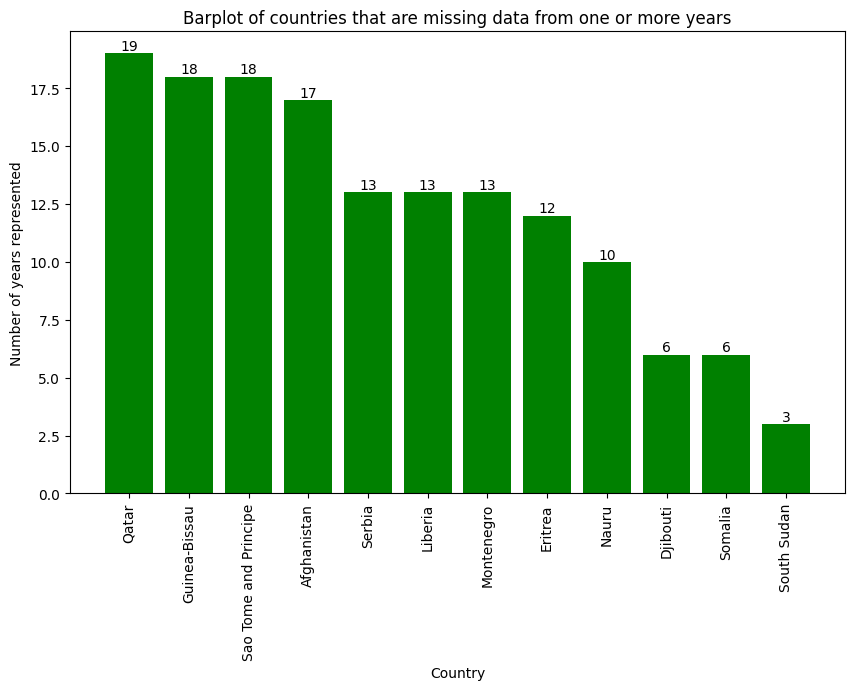

In [20]:
# Selecting data for countries missing at least one year 
entity_counts = data['Entity'].value_counts()
appearance_threshold = 20
filtered_entities = entity_counts[~entity_counts.isin([0, appearance_threshold])].index.tolist()
filtered_data = data[data['Entity'].isin(filtered_entities)]
entity_table = filtered_data['Entity'].value_counts()
entity_table = entity_table[filtered_entities]


plt.figure(figsize=(10, 6))  
plt.bar(filtered_entities, entity_table, color="green")
plt.title("Barplot of countries that are missing data from one or more years")
plt.xticks(rotation=90) 
plt.xlabel("Country")
plt.ylabel("Number of years represented")
# adding labels
for i, count in enumerate(entity_table):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

plt.show()

Here, we notice that there are 12 countries (out of 176) thar are missing data from certain years. The country missing the most data is South Sudan with only 3 observations, whereas Quatar is only missing one obesrvation.

Now, we will look at the **quantitative** variables. Starting by plotting the histograms of the first three variables. We looked at boxplots of the difference of variables and performed transformations to make them more normalized. The following plots show the variables after transformation. We used the square root transformation and the log transformation according to which transformation worked best. 

In [21]:
#Transformation of variables
#WARNING: Only run ONCE!!
data['Access to electricity (% of population)'] = np.sqrt(data['Access to electricity (% of population)'])
data["Access to clean fuels for cooking"] = np.sqrt(data["Access to clean fuels for cooking"])

data["Electricity from nuclear (TWh)"] = np.sqrt(data["Electricity from nuclear (TWh)"])
data["Electricity from renewables (TWh)"] = np.sqrt(data["Electricity from renewables (TWh)"])
data["Value_co2_emissions_kt_by_country"] = np.log(data["Value_co2_emissions_kt_by_country"])

data["Primary energy consumption per capita (kWh/person)"] = np.log(data["Primary energy consumption per capita (kWh/person)"])
data["gdp_per_capita"] = np.log(data["gdp_per_capita"])
data["Land Area(Km2)"] = np.log(data["Land Area(Km2)"])

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/d_/vz74p2wd2130_h4z5g1ch3vc0000gn/T/ipykernel_19615/1985047702.py:5: SyntaxWarning: invalid escape sequence '\s'
  axs[0].set_title('Percentage of population with access to electricity \sqrt transform')
/var/folders/d_/vz74p2wd2130_h4z5g1ch3vc0000gn/T/ipykernel_19615/1985047702.py:8: SyntaxWarning: invalid escape sequence '\s'
  axs[1].set_title('Percentage of population mainly using clean fuels  \sqrt transform')


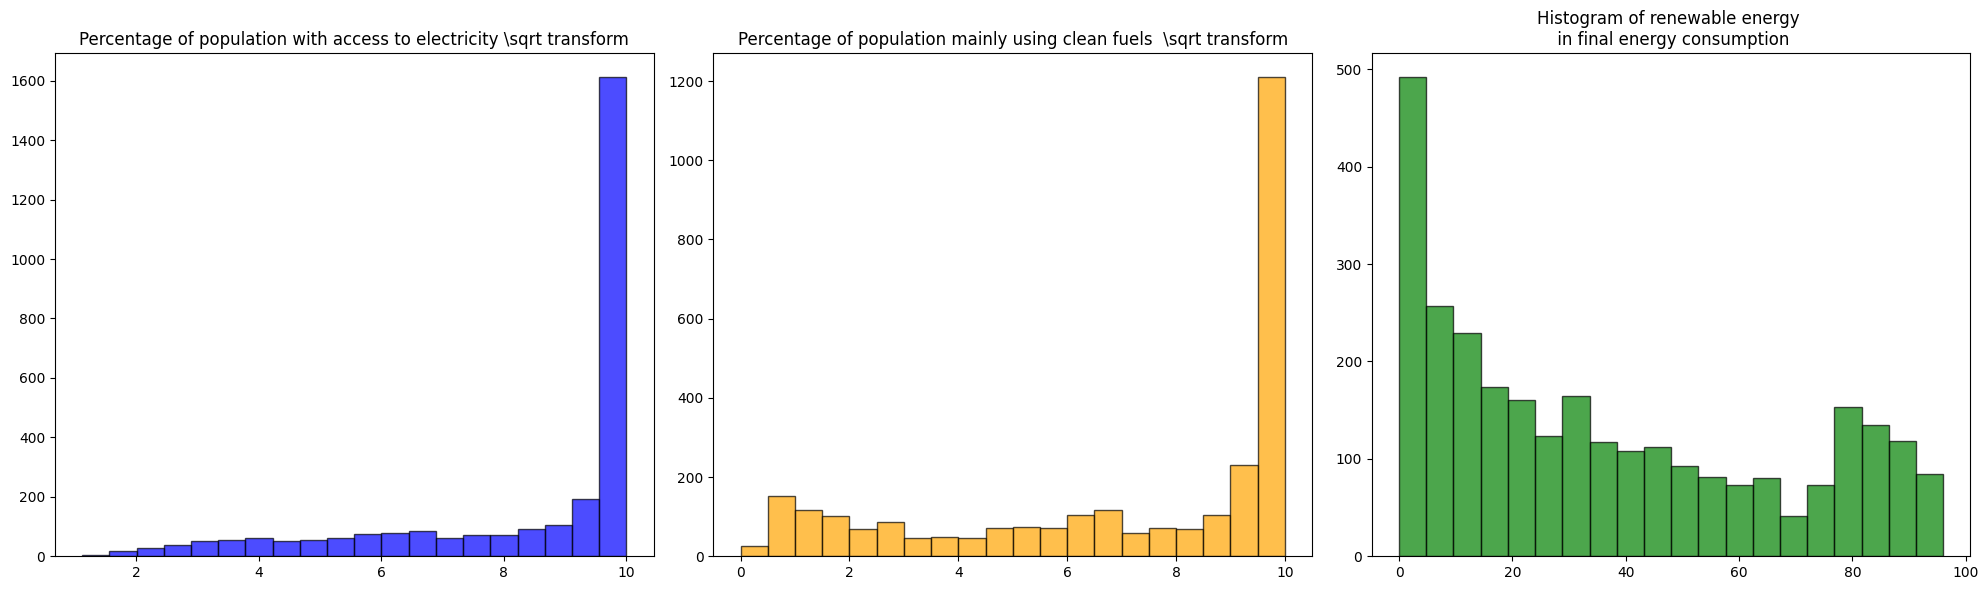

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot the histograms for each column in separate subplots
axs[0].hist(data['Access to electricity (% of population)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Percentage of population with access to electricity \sqrt transform')

axs[1].hist(data["Access to clean fuels for cooking"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Percentage of population mainly using clean fuels  \sqrt transform')

axs[2].hist(data["Renewable energy share in the total final energy consumption (%)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Histogram of renewable energy \n in final energy consumption')

plt.tight_layout()
plt.show()

This shows us that in a lot of places, a 100% of the population has access to electricity. This is also true for usage of clean fuels, but a larger part of the world has 0% access to clean fuels. When it comes to renewable energy in final energy consumption, most coutries are at 0%, but the people who have more than that is more or less evenly distributed between 0 and 95%. On average, the percentage of renewable energy consumption is 35%.

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/var/folders/d_/vz74p2wd2130_h4z5g1ch3vc0000gn/T/ipykernel_19615/2431325215.py:8: SyntaxWarning: invalid escape sequence '\l'
  axs[0][1].set_title('Energy consumption per person \n in kilowatt hours. \log transform')
/var/folders/d_/vz74p2wd2130_h4z5g1ch3vc0000gn/T/ipykernel_19615/2431325215.py:14: SyntaxWarning: invalid escape sequence '\l'
  axs[0][3].set_title('Carbon dioxide emissio

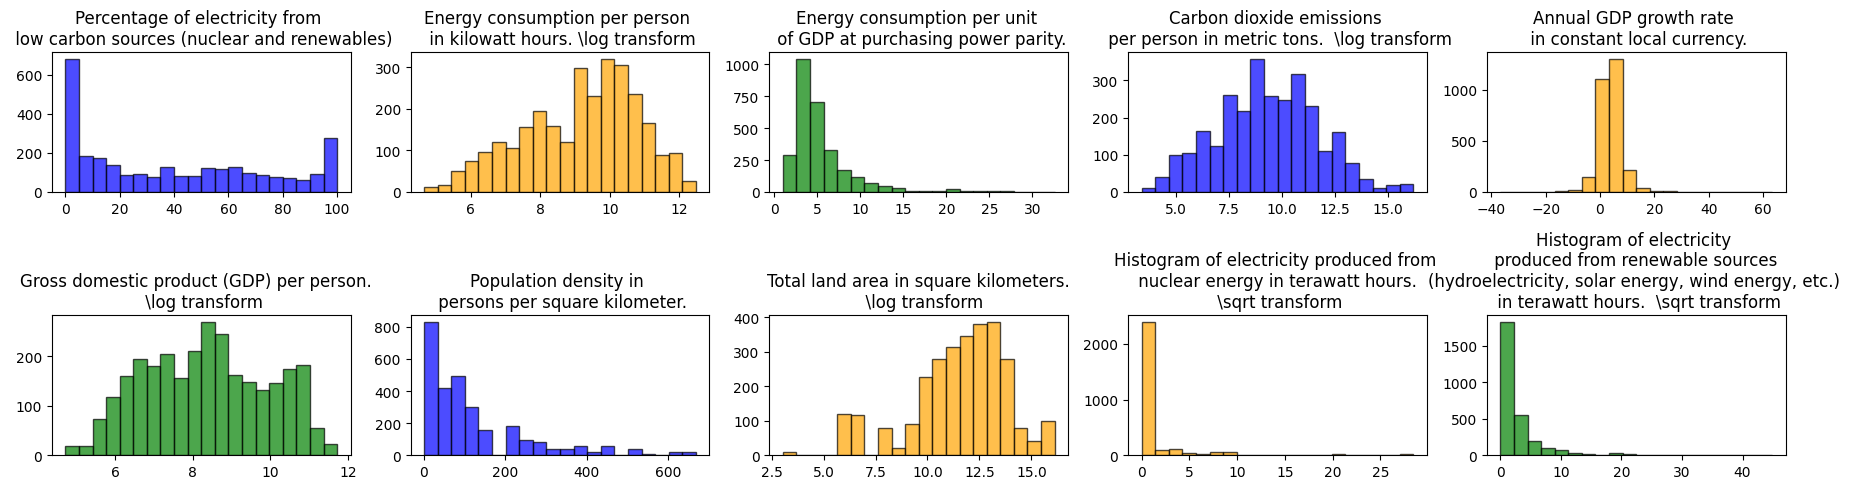

In [23]:
fig, axs = plt.subplots(2, 5, figsize=(18, 5))

# Plotting of the histograms for each column in separate subplots
axs[0][0].hist(data['Low-carbon electricity (% electricity)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][0].set_title('Percentage of electricity from \n low carbon sources (nuclear and renewables)')

axs[0][1].hist(data["Primary energy consumption per capita (kWh/person)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[0][1].set_title('Energy consumption per person \n in kilowatt hours. \log transform')

axs[0][2].hist(data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[0][2].set_title('Energy consumption per unit \n of GDP at purchasing power parity.')

axs[0][3].hist(data["Value_co2_emissions_kt_by_country"], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][3].set_title('Carbon dioxide emissions \n per person in metric tons.  \log transform')

axs[0][4].hist(data["gdp_growth"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[0][4].set_title('Annual GDP growth rate \n in constant local currency.')

axs[1][0].hist(data["gdp_per_capita"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[1][0].set_title('Gross domestic product (GDP) per person.  \n \log transform')

axs[1][1].hist(data['Density.n.P.Km2.'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[1][1].set_title('Population density in \n persons per square kilometer.')

axs[1][2].hist(data["Land Area(Km2)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][2].set_title('Total land area in square kilometers.\n  \log transform')

axs[1][3].hist(data["Electricity from nuclear (TWh)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][3].set_title('Histogram of electricity produced from \n nuclear energy in terawatt hours. \n \sqrt transform')

axs[1][4].hist(data["Electricity from renewables (TWh)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[1][4].set_title('Histogram of electricity \n produced from renewable sources \n(hydroelectricity, solar energy, wind energy, etc.) \n in terawatt hours.  \sqrt transform')

plt.tight_layout()
plt.show()

Among the remaining variables, we also chose to log-tranform the $CO_2$ emissions per person, energy consumption per person in Kwh, GDP per person and total land area in km². From the descriptive analysis, we can interperet that: 
- It is common to have 0% electricity coming from low carbon sources, but the amount of places where that percentage is 100% is far from negligible. 
- Most people consume between $e^9 - e^{11}$ = 8000-60000 kWh of energy per year
- The energy consumption per unit of GDP is centered around 4 Kwh per unit of GPP
- The most common carbon dioxide emission per person is $e^8$ = 2980 metric tonnes per year
- The annual GDP growth rate is normally around 0 to 5%
- GDP per person is centered around $e^8$ = 2980
- Most places have a very low population density
- For the variables of electricity produced from renewable and nuclear power, there is high frequency of the lowest level of energy production. This is logical as not all countries produce a lot of electricity.

### Question 5

We explore the data further by finding the countries with the highest and lowest $CO_2$ emissions per year. We do not take into account the countries' size or population density, which can be investigated in further studies. 

In [24]:
co2_pays_annees = {}
country = ""
tot = 0
for i in range(data.shape[0]):
    if data["Entity"][i] == country:
        tot += data["Value_co2_emissions_kt_by_country"][i]
    else:
        co2_pays_annees[country] = tot
        country = data["Entity"][i]
        tot = 0
        
del co2_pays_annees[""]

co2_pays_annees0 = co2_pays_annees.copy() 
biggest = []
temp = co2_pays_annees
for i in range(5):
    big = max(temp, key=co2_pays_annees.get)
    biggest.append(big)
    del temp[big]

lowest = []
temp2 = co2_pays_annees
for i in range(5):
    low = min(temp, key=co2_pays_annees.get)
    lowest.append(low)
    del temp2[low]
    
print("The countries with the highest amount of CO2 emissions are (highest amount first): ",biggest[:5])

print("The countries with the lowest amount of CO2 emissions are (lowest amount first): ",lowest[:5])
    
df_co2_pays_annees = pd.DataFrame({'country':co2_pays_annees0.keys(), 'co2 emission':co2_pays_annees0.values()})


The countries with the highest amount of CO2 emissions are (highest amount first):  ['China', 'United States', 'India', 'Japan', 'Germany']
The countries with the lowest amount of CO2 emissions are (lowest amount first):  ['South Sudan', 'Djibouti', 'Somalia', 'Nauru', 'Eritrea']


We notice that the five countries with the lowest amount of $CO_2$ emissions are the five countries are represented the least in terms of number of years. This means that they are not necessarily the countries that do in fact emit the least amount of $CO_2$ but simply that we do not have enough information to conclude.

The next chart shows the heterogeneity in the amount of $CO_2$ emissions in the countries studied in this project.

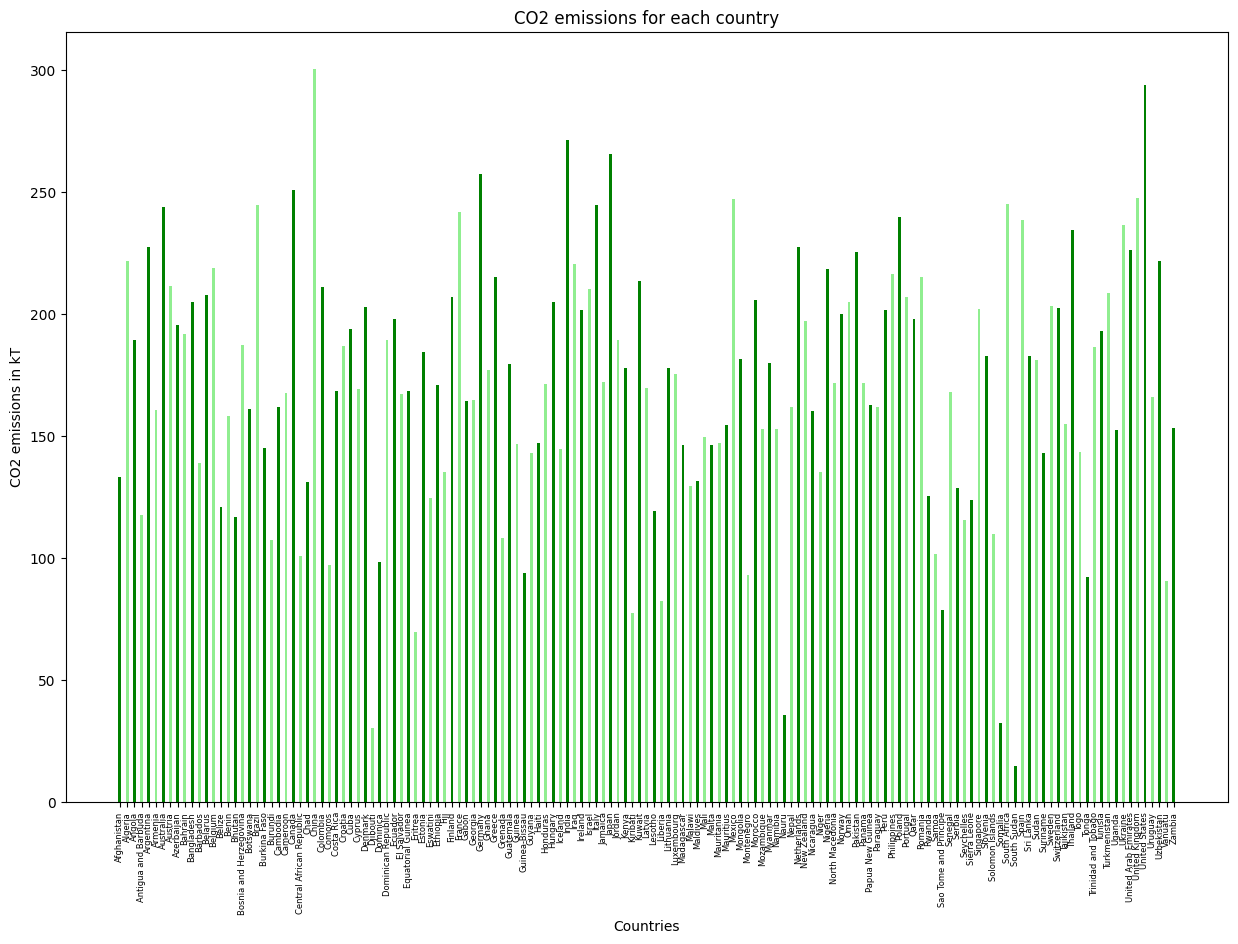

In [25]:
plt.figure(figsize=(15, 10))  
plt.bar(df_co2_pays_annees['country'],df_co2_pays_annees['co2 emission'],width=0.4,color = ['green', 'lightgreen']) #, figsize=(500, 100), color = ['red', 'blue']) #y = "co2 emission", x = "country",
plt.title("CO2 emissions for each country")
plt.xticks(rotation=90,fontsize=6) 
plt.xlabel("Countries")
plt.ylabel("CO2 emissions in kT")
plt.show()

### Question 6

We continue the descriptive analysis of the data through a multi-dimensional analysis. Firstly, we explore the data through a scatter plot matrix.

ModuleNotFoundError: No module named 'scipy'

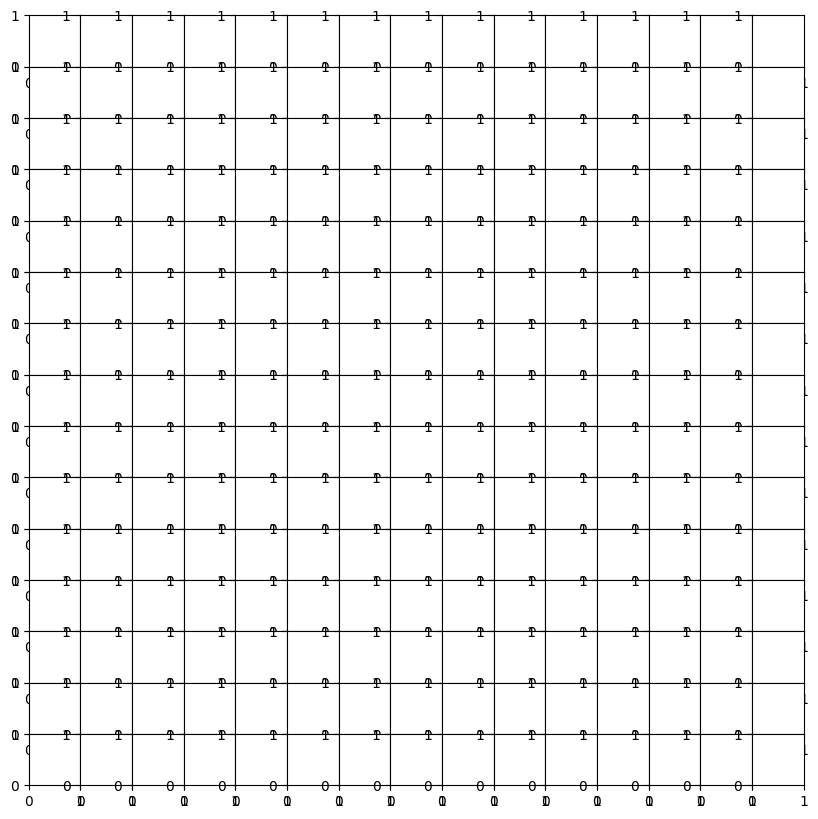

In [26]:
scatter_matrix =pd.plotting.scatter_matrix(data.iloc[:, 2:], figsize=(10, 10), alpha=0.5, diagonal='kde')
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation('horizontal')
    ax.yaxis.label.set_horizontalalignment('right')
    #ax.yaxis.label.set_va('center')
    #ax.yaxis.label.set_fontsize(4) 
plt.suptitle("Scatterplot Matrix", y=0.92, fontsize=20)
plt.show()


At first glance, this scatter plot does not give us much insight, but we can deduce the following :
- As access to electricity increases, so does the availability of clean fuels for cooking.
- As access to electricity increases, the share of renewable energy in total final energy consumption decreases.
- Regardless of GDP per capita, GDP growth remains more or less constant.

We then proceed to explore the correlations in the data set using a correlation plot

In [ ]:
c_data = data.iloc[:, 2:]

corr = c_data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='RdBu', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Plot')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

This correlation plot confirms that the access to electricity and the availability of clean fuels for cooking are negatively correlated to the share of renewable energy in total final energy consumption, and that the access to electricity and the availability of clean fuels for cooking is positively correlated.

Electricity from nuclear energy is correlated to electricity from renewables, which tells us that when a country produces a lot of energy from renewables, it is also likely that they produce a lot of nuclear energy. We also notice that for countries with bigger land area, more energy is produced (renewable and nuclear), and the carbon dioxide emissions per person is also bigger.

Primary energy consumption per capita is correlated to the GDP per capita.

In addition, electricity from renewables and electricity from nuclear is also positively correlated, electricity from renewables more than electricity from nuclear.

Other variables can also be commented, but the ones mentioned above gives us the most certain information. We also notice that a lot of the variables are not correlated at all or barely positively or negatively correlated.

### Question 7

The following commands perform a Principal Component Analysis (PCA) on quantitative variables. The variable to observe ("Value_co2_emissions_by_country") is not used.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler

data_quantitative = data[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]
ss= StandardScaler()
X=ss.fit_transform(data_quantitative)
#X= data_quantitative
# PCA on quantitative variables
pca = PCA()
C = pca.fit_transform(X)

# The first 10 eigenvalues and their cumulative percentage of variance
eigenvalues_df = pd.DataFrame({
    'Eigenvalues': pca.explained_variance_[:10],
    'Cumulative Variance (%)': pca.explained_variance_ratio_[:10].cumsum() * 100
})

print("Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:")
print(eigenvalues_df)

We observe a cumulative percentage of variance of 86.216018 corresponding to 7 eigenvalues. We will keep 7 dimensions.

The next plot shows the percentage of explained variance corresponding to each dimension.

In [ ]:
# Decay of Explained Variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Decay of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
# Boxplots for individual coordinates
plt.boxplot(C[:,0:9])
plt.show()

##### From the correlation matrix between variables and dimensions in R we learned :

From the graph we can observe what variables correspond the most to each dimension: 

- Dimension 1: Access to clean fuels for cooking, Access to electricity (% of population), Primary energy consmption per capita and gdp per capita are positively correlated to the first dimenstion, whereas Renewable energy share in total final energy consumption is negatively correlated to it. 
- Dimension 2: Electricity from renewables, Land Area and Electricity from nuclear. 
- Dimension 3: Energy intensity level of primary energy, longlitude energy consumption per capita and gdp growth.
- Dimension 4: Low carbon electricity is positively correlated
- Dimension 5: Year is positively correlated
- Dimension 6: Density is positively correlated
- Dimension 7: GDP growth is positively correlated and Energy intensity level is negatively correlated. 
- Dimension 8: Longlitude is negatively correlated
- Dimension 9: Latitude is positively correlated

From these observations we can interperet that the first dimension corresponds to countries that are developed. If the access to fuels, electricity, energy consumption and GDP per capita is high it indicates that people in this country have access to and use electricity. However, for these countries, the share of renewable energy is low, meaning there are countries that use fossil or nuclear fuel, and they emit higher levels of $CO_2$. This is a possible interpretation of dimension 1. Looking at the geographical position, the latitude is positive and longlitude slightly negative. This can correspont to countries in Europe, especially countriel like the UK and Spain. 

For dimension 2, one can possibly deduce that countries with higher land area have a higher production of electricity, for renewable and nuclear as energy production often requires vast amounts of land. 

Dimension 3 could suggest that there is a correlation between the energy used per unit of GDP, energy consumption per capita, longitude and GDP growth. For countries in this group it can suggest economic growth could induce an increase in energy consumption per capita as people enjoy a high standard of living. Secondly, industrialization often accompanies economic growth, which can result in higher energy intensity in production processes. The positive correlation could also indicate that energy efficiency measures are not keeping pace with economic growth. As the longitude is positively correlated, it can suggest that these are countries located near the pacific ocean or north Asia. Like Japan and China for example. 

However, dimension 7 is representing countries that behave differently than countries in dimension 3. These are countries whose economies are becoming more energy efficient over time. This may result from technological advancements, improved industrial processes, and energy conservation measures. Looking at geographical position, it could be countries located in North America.

The size of the dimensions also suggests that there are more countries that behave like in dimension 3 than in dimension 7.

In [ ]:
pca.components_[0]*np.sqrt(pca.explained_variance_[0])

In [ ]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 2
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom, fontsize=8)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
plt.grid()
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
# cercle
c=plt.Circle((0,0), radius=1, color='darkblue', fill=False)
ax.add_patch(c)
plt.show()

In [ ]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 3
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom, fontsize=8)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
plt.grid()
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 3")
# cercle
c=plt.Circle((0,0), radius=1, color='darkblue', fill=False)
ax.add_patch(c)
plt.show()

We noticed a mirror symmetry when we represent the variable factor maps in R and in Python. However, that is not a problem and does not impact the results.

##### Interpretations from R :

The projection of variables along the dimensions 1 and 2 confirms the distributions from the previous plot. We have the same groups appearing on the axes:

Dimension 1: Access to clean fuels for cooking, Access to electricity (% of population), Primary energy consmption per capita and GDP per capita are positively correlated. Renewable energy share in total final energy consumption is negatively correlated.
Dimension 2: Electricity from renewables, Land Area and Electricity from nuclear are positively correlated. 

On the second projection of the variables we also have that energy intensity level of primary energy, longitude and GDP growth are positively correlated with dimension 3. However, Primary energy consumption per capita is a more important variable for dimension 1 than for dimension 3, so it appears further in the direction of dimension 1. However, it is still positively correlated to dimension 3.


### Question 8

Visualization of the potential dependency between the variable Year and the variable to predict (Value-co2-emissions).

In [ ]:
# Grouping the data by year and sum the CO2 emissions
sum_co2_by_year = data.groupby('Year')['Value_co2_emissions_kt_by_country'].sum()

plt.plot(sum_co2_by_year.index, sum_co2_by_year.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Total CO2 emissions (kt)')
plt.title('Total CO2 emissions per year')
plt.show()


Remark: We no longer have any observations for 2020, that's why it's at 0.

In [ ]:
data['Year'].corr(data['Value_co2_emissions_kt_by_country'])

A correlation coefficient close to 1 or -1 indicates a strong correlation, while a coefficient close to 0 indicates a weak correlation. We observe a correlation of 0.047, therefore there is not a strong dependency between the variable 'Year' and the variable 'CO2 emissions Value'.

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[['Year']] 
y = data['Value_co2_emissions_kt_by_country']
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Score:",  model.score(X, y))

* (From R) The p-values associated with the coefficients (0.0541 for the intercept and 0.016 for the year) are both higher than a commonly used significance threshold of 0.05. This means there is not enough evidence to reject the null hypothesis that the coefficients are zero, suggesting there is no significant relationship between the year and CO2 emissions.

* The coefficient of determination (R²) is very close to zero (0.0022), indicating that the linear regression fails to explain much of the variation in CO2 emissions from the year.

* (From R) The Fisher test has a statistic of 6.384 with a p-value of 0.01157, confirming the overall lack of significance of the regression model.

In conclusion, these results suggest there is no significant relationship between the year and CO2 emissions in your data.

## Modelling
In this section we are predicting the Value-co2-emissions variable using different regression methods.

### Question 1 : Splitting the data set 

In [ ]:
# Checking if all missing values are removed: 
data.isna().sum().sum()

In [ ]:
# Qualitative data transformed to dummies 
dataDum=pd.get_dummies(data[["Year"]]) 
# We dont use the varaible Entity in the regression beacouse it would give us a lot of extra dummy variables

del dataDum["Year_2000"]

# Quantitaive data  
dataQuant=data[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]
dfC=pd.concat([dataDum,dataQuant],axis=1)
dfC.head()

##### Defining the training/testing sets

We start the modelling part of this project by dividing the data set into a training set and a test set. We affect 20% of the data to the test set.

In [ ]:
# variable to explain
Yr=data["Value_co2_emissions_kt_by_country"]

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting innto test and training sets, with the test set beeing 20% of the data 

X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=0.2,random_state=42)

This step is necessary when we’re focusing on algorithm performance for two reasons:

*  By using a separate test set, we can test the model's ability to generalize to unseen data and get unbiaised testing. 

*  Using a separate test set helps to detect overfitting of the model. By evaluating the model on an independent test set, we can detect whether the model generalizes properly or if it is too specific to the training data.


##### Standardization of data using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  

Xr_train = scaler.transform(X_train)  
Xr_test = scaler.transform(X_test)

Remark : 
In this project, we will use the $R^2$ metric to measure the fit of a model. The above two functions calculate the $R^2$ and adjusted $R^2$ score for a given model. All models will be tested with the $R^2$ score, but we will keep in mind that a high value of $R^2$ can imply an overfitted model. We will also calculate the Mean Squared Error (MSE) for each model. We did not have time to implement the adjusted $R^2$ for all the models, but this could be an interesting metric to look at for further exploration.

### Question 2 : Exploration of regression models 

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import  MLPRegressor
from sklearn.model_selection import GridSearchCV

Plotting the variable to predict (Value_co2_emissions_kt_by_country)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(data["Value_co2_emissions_kt_by_country"],".")
plt.xlabel("Individulas")
plt.ylabel("Value_co2_emissions")

#### Linear models

##### Linear regression

We start by performing a linear regression using ordinary least square linear regression. 

In [ ]:
lr_model = LinearRegression(n_jobs=-1)
lr_model_fit=lr_model.fit(X_train, Yr_train)
lr_pred = lr_model_fit.predict(X_test)
lr_mse = mean_squared_error(Yr_test, lr_pred)
lr_r2 = r2_score(Yr_test, lr_pred)

plt.plot(lr_pred, Yr_test - lr_pred, ".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [ ]:
print("MSE: ", lr_mse)
print("R2: ", lr_r2)

In [ ]:
coef = pd.Series(lr_model.coef_, index = X_train.columns)
imp_coef = coef[coef != 0].sort_values(ascending=False)
print("Linear model coefficients: ")
print(imp_coef)

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

From the linear regression model, we find that Land Area (Km2) contributes the most, whilst the Year variables contributes the least.

There exist several methods adding a penelty term in linear models. We will now explore the Ridge and Lasso regression.

##### Ridge regression

Ridge regression works to avoid overfitting by adding constraints to the parameters. This also reduces the variance of the estimators. It uses an $l_2$ constraint on the parameter $ \beta $. The ridge estimator is defined as follows: 

$\tilde{\beta} = \text{argmin}_{\beta \in \mathbb{R}^{p+1}} \left\{ \sum_{i=1}^{n} \left( Y_i - \sum_{j=0}^{p} X_{j,i} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}$

We will optimise  the parameter $\lambda$ by cross-validation. 

Ridge regression does not select variables, so the main weakness of the model is interpretation difficulties, especially if the number of predictors $p$ is large. 


##### Ridge without cross validation

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(Xr_train, Yr_train)
ridge_pred = ridge_model.predict(Xr_test)
ridge_mse = mean_squared_error(Yr_test, ridge_pred)
ridge_r2 = r2_score(Yr_test, ridge_pred)

print("Ridge MSE: ", ridge_mse)
print("Ridge R2: ", ridge_r2)

##### Ridge with cross validation

In [ ]:
ridge_params = [{"alpha":[0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9]}] 
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=10)
ridge_grid_opt =ridge_grid.fit(Xr_train, Yr_train)
best_ridge_model = ridge_grid_opt.best_estimator_
best_ridge_pred = ridge_grid_opt.predict(Xr_test)
best_ridge_mse = mean_squared_error(Yr_test, best_ridge_pred)
best_ridge_r2 = r2_score(Yr_test, best_ridge_pred)

print("Alpha (ou lambda) :",ridge_grid_opt.best_params_["alpha"])

plt.plot(best_ridge_pred,Yr_test-best_ridge_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

The residual plot resembles the one from the first linear regression with values between 4 and -3.

In [ ]:
print("MSE : ",best_ridge_mse)
print("R2 : ",best_ridge_r2)
print("CV best_score_: ", ridge_grid_opt.best_score_) # Mean cross-validated score of the best_estimator

We see a slight improvement from the linear regression and ridge without cross-validation.

##### Study of the coefficients :

In [1]:
regRidge=Ridge(alpha=ridge_grid_opt.best_params_['alpha'])
model_ridge=regRidge.fit(Xr_train,Yr_train)
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
print("Ridge conserves " + str(sum(coef != 0)) + 
      " variables and deletes " +  str(sum(coef == 0)))
print(coef[np.where(coef == 0)[0]])

NameError: name 'Ridge' is not defined

In contrast to the Lasso regression, Ridge does not delete variables. The variable which is not a part of the model is Year_2020, this value is 0 for all of the individuals. 

In [188]:
imp_coef = coef[coef != 0].sort_values(ascending=False)
print("Ridge model coefficients: ")
print(imp_coef)

Ridge model coefficients: 
Land Area(Km2)                                                      1.710869
Primary energy consumption per capita (kWh/person)                  0.552219
Density.n.P.Km2.                                                    0.549194
Access to electricity (% of population)                             0.379096
Electricity from renewables (TWh)                                   0.278881
gdp_per_capita                                                      0.204708
Latitude                                                            0.204097
Longitude                                                           0.175261
Electricity from nuclear (TWh)                                      0.093508
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.042417
Year_2001                                                           0.026710
gdp_growth                                                          0.021906
Year_2017                                        

Text(0.5, 1.0, 'Coefficients du modèle lasso')

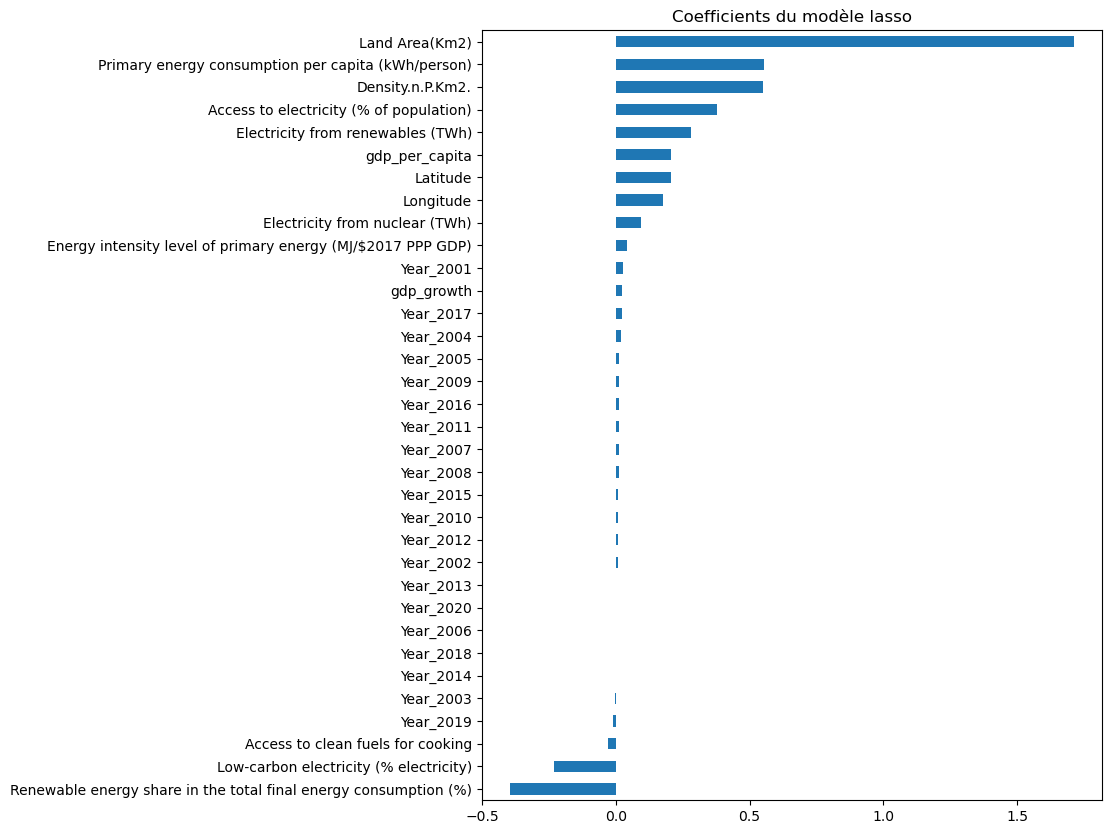

In [189]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

We see the same trend as for the linear regression, Land Area(Km2) and Primary energy consumption per capita (kWh/person) are the most important variables for both regression models. 

##### Lasso regression

Lasso regression is advantageous compared to the ridge regression in the sense that with variable selection, results are more interpretable. Lasso stands for Least Absolute Shrinkage and Selection Operator. The lasso estimator is defined as follows: 

$$
\beta_{\text{Lasso}} = \text{argmin}_{\beta \in \mathbb{R}^{p+1}} \left\{ \sum_{i=1}^{n} \left( Y_i - \sum_{j=0}^{p} X_{i}^{(j)} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}
$$

As with ridge, we will optimise $\lambda > 0$ to tune the model.

##### Lasso without cross validation

In [190]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(Xr_train, Yr_train)
lasso_pred = lasso_model.predict(Xr_test)
lasso_mse = mean_squared_error(Yr_test, lasso_pred)
lasso_r2 = r2_score(Yr_test, lasso_pred)

print("Lasso MSE: ", lasso_mse)
print("Lasso R2: ", lasso_r2)

Lasso MSE:  3.7915301334621767
Lasso R2:  0.3270598446360503


##### Lasso with cross validation

Alpha :  0.01


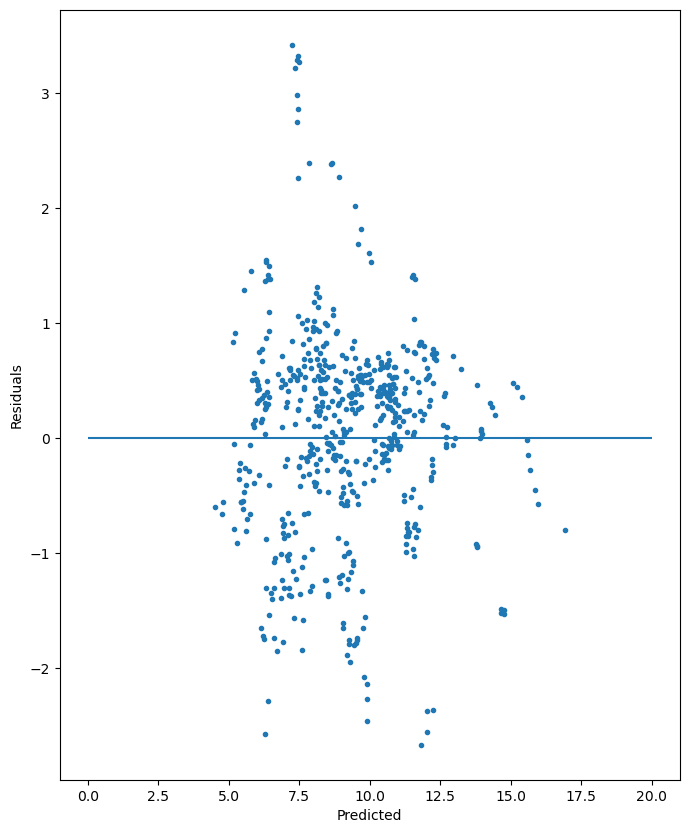

In [191]:
lasso_params = {'alpha': [0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=10,n_jobs=-1)
lasso_grid_opt=lasso_grid.fit(Xr_train, Yr_train)
best_lasso_model = lasso_grid_opt.best_estimator_
best_lasso_pred = lasso_grid_opt.predict(Xr_test)
best_lasso_mse = mean_squared_error(Yr_test, best_lasso_pred)
best_lasso_r2 = r2_score(Yr_test, best_lasso_pred)

print("Alpha : ",lasso_grid_opt.best_params_["alpha"])

plt.plot(best_lasso_pred,Yr_test-best_lasso_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()


In [192]:
print("MSE : ",best_lasso_mse)
print("R2 : ",best_lasso_r2)
print("CV best_score_: ", lasso_grid_opt.best_score_)

MSE :  0.8172415294707983
R2 :  0.854951794538484
CV best_score_:  0.8629735541564726


The first thing we notice is that the MSE and R2 is largely improved by optimising lambda/alpha.

##### Study of the coefficients :

In [193]:
regLasso=Lasso(alpha=lasso_grid_opt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserves " + str(sum(coef != 0)) + 
      " variables and deletes " +  str(sum(coef == 0)))

Lasso conserve 17 variables and delete 17


In [194]:
imp_coef = coef[coef != 0].sort_values(ascending=False)
print("Lasso model coefficients: ")
print(imp_coef)

Lasso model coefficients: 
Land Area(Km2)                                                      1.705396
Primary energy consumption per capita (kWh/person)                  0.605800
Density.n.P.Km2.                                                    0.545516
Access to electricity (% of population)                             0.344885
Electricity from renewables (TWh)                                   0.273062
Latitude                                                            0.202869
Longitude                                                           0.166395
gdp_per_capita                                                      0.149659
Electricity from nuclear (TWh)                                      0.092412
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.016671
gdp_growth                                                          0.011747
Year_2001                                                           0.005815
Year_2017                                        

Text(0.5, 1.0, 'Lasso model coefficients')

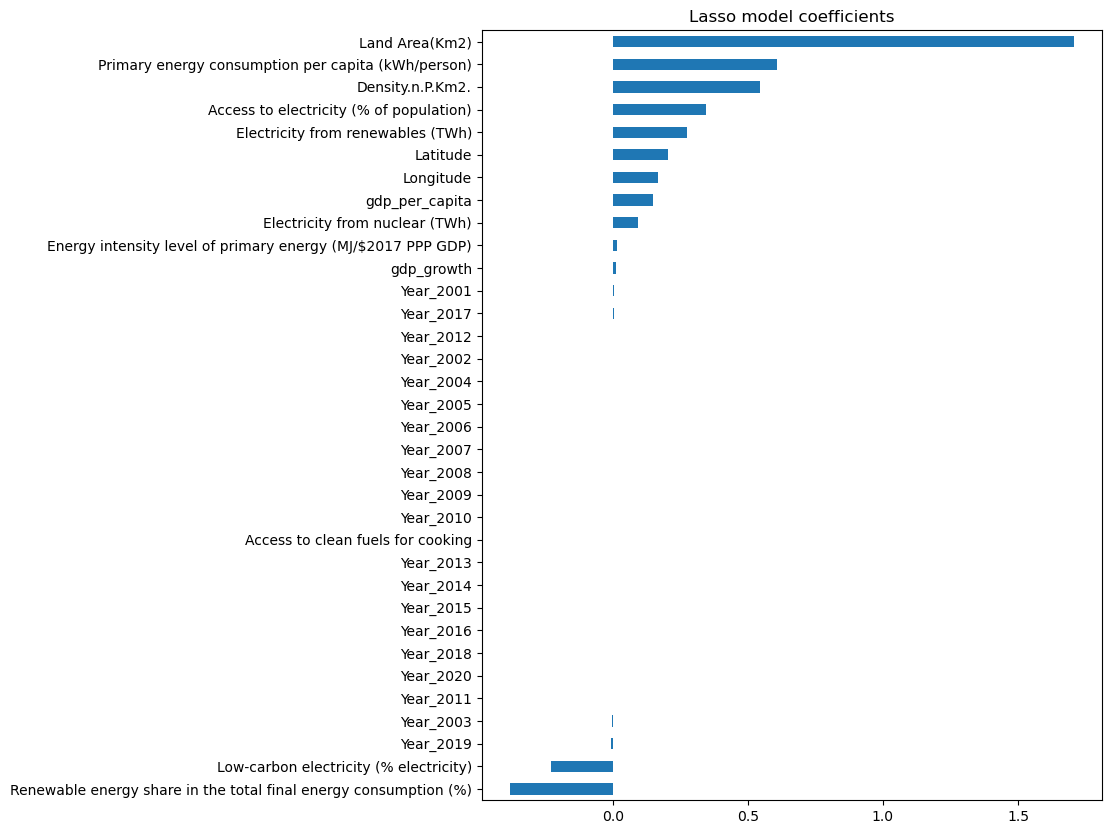

In [195]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Lasso model coefficients")

Only 17 variables are kept, but the top two are the same as in the earlier used models. 

##### Plotting mean sqared error for each cross validation :

Alpha : 0.01


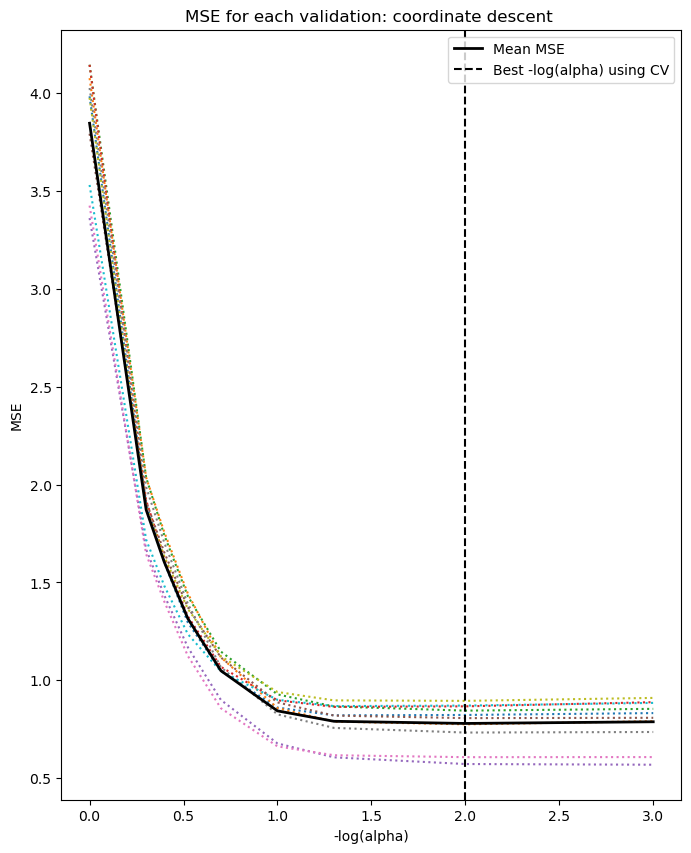

In [196]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=10, alphas=[0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1],n_jobs=-1,random_state=42).fit(Xr_train,Yr_train)
m_log_alphas = -np.log10(model.alphas_)
print('Alpha :', model.alpha_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Mean MSE ', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='Best -log(alpha) using CV')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE for each validation: coordinate descent ')
plt.show()

##### Plot of regularisation paths : 

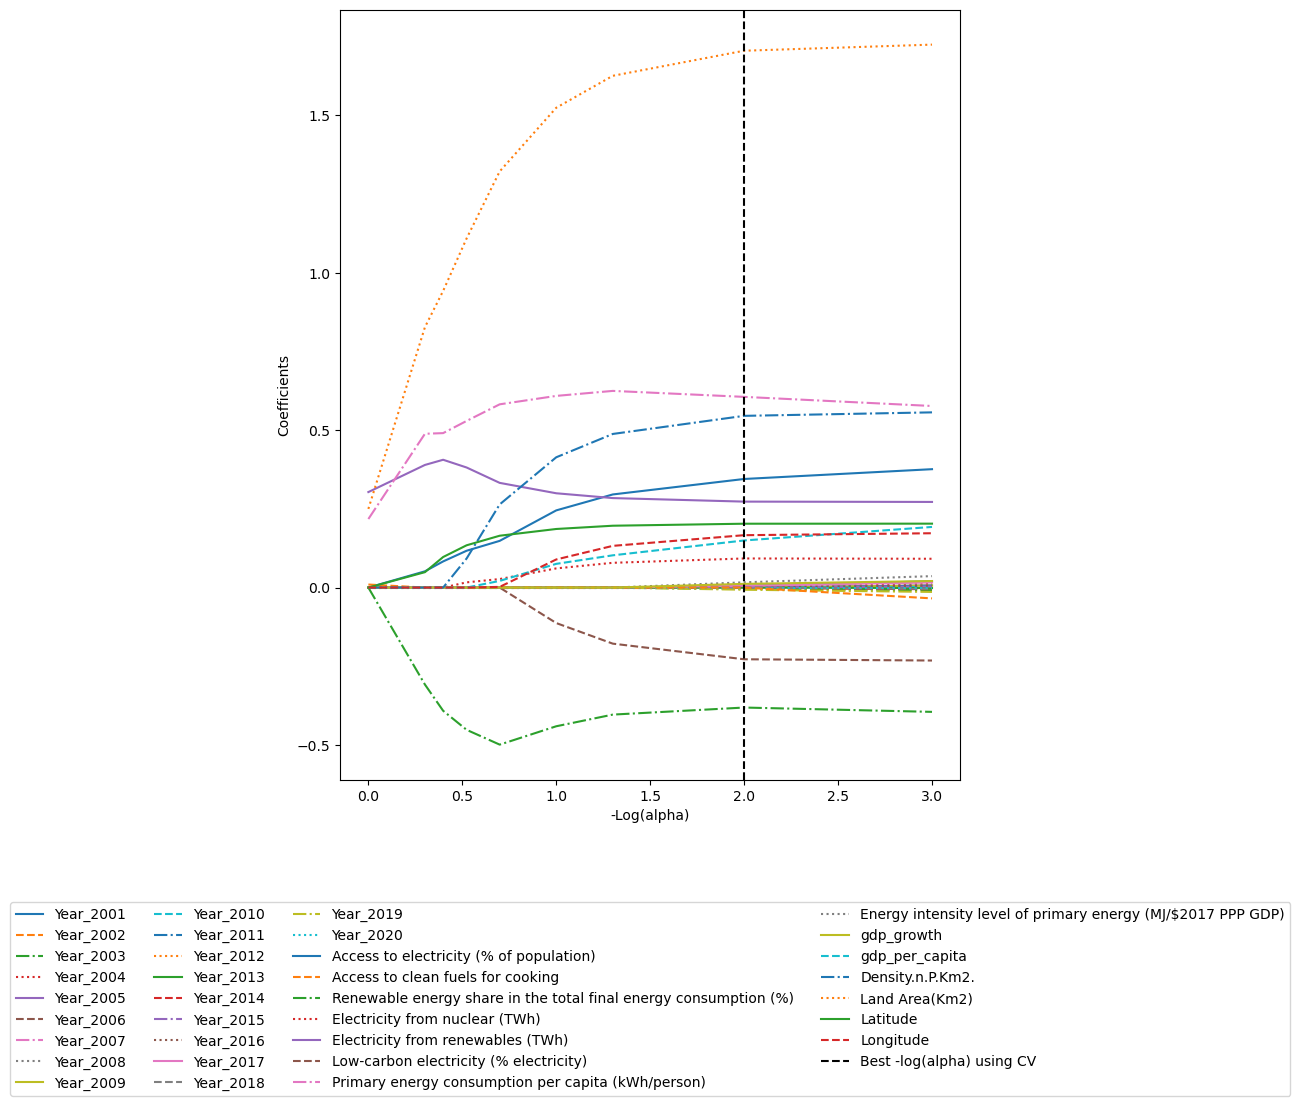

In [197]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xr_train,Yr_train, alphas=[0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1],)

plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])
i=0

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    #l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
    plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s, label= dfC.columns[i])
    i+=1
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='Best -log(alpha) using CV')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.show()

In lasso regression, the regularization path results in some coefficients being exactly zero as the regularization parameter increases. This is because lasso regression employs an l1 penalty, which encourages sparsity in the coefficient vector. Lasso has a tendency to perform feature selection by setting coefficients of less important features to zero. This is the case for the variables "Access.to.clean.fuels.for.cooking ", the Year variables, "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP." (very small infuence in python) and "gdp_growth ". In total half the variables were deleted.

#### K-Nearest Neighbors

When performing a KNN regression, the choice of the hyperperameter $k$ is important.  A smaller value of $k$ leads to a more flexible model with higher variance but lower bias, whereas a larger value of $k$ results in a smoother decision boundary with lower variance but potentially higher bias. We start by performing cross validation to find the optimal value of k. 

Best score = 0.005400, Best number of neighbors = {'n_neighbors': 1}


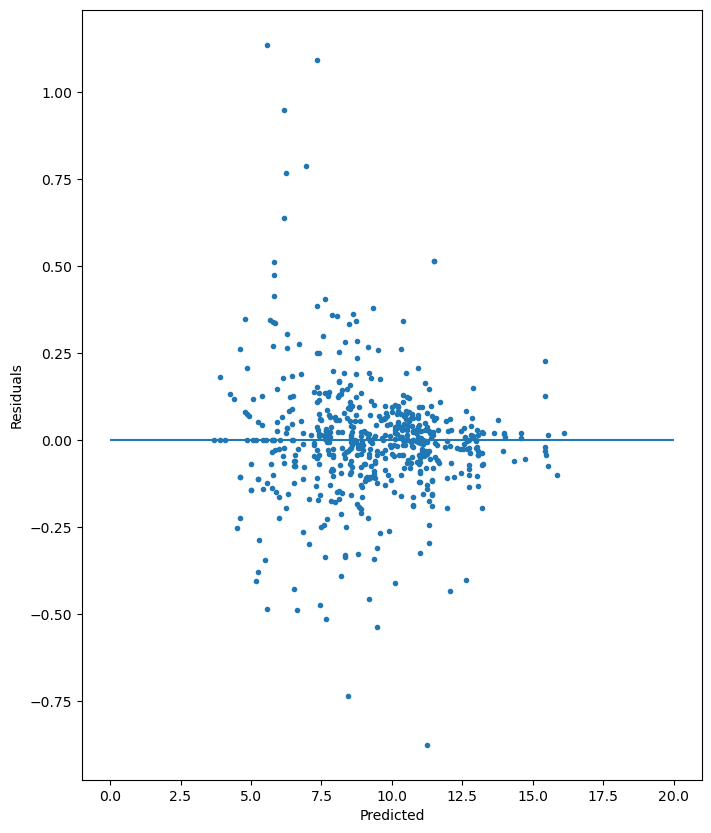

In [198]:
knnr_params=[{"n_neighbors":list(range(1,15))}]
knnr_grid = GridSearchCV(KNeighborsRegressor(), knnr_params, cv=10, n_jobs=-1)
knnr_grid_opt= knnr_grid.fit(X_train, Yr_train)
best_knnr_model = knnr_grid_opt.best_estimator_
best_knnr_pred = knnr_grid_opt.predict(X_test)
best_knnr_mse = mean_squared_error(Yr_test, best_knnr_pred)
best_knnr_r2 = r2_score(Yr_test, best_knnr_pred)

print("Best score = %f, Best number of neighbors = %s" % (1.-knnr_grid_opt.best_score_,knnr_grid_opt.best_params_))

plt.plot(best_knnr_pred,Yr_test-best_knnr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

By cross-validation, the optimal value for the number of neighbors is 1. This means our model has low bias and high variance. The model can be sensitive to noise and local fluctuations in the data. It can capture fine-grained patterns, but might not generalize well on unseen data; there is a risk of overfitting. 

In [199]:
print("MSE : ",best_knnr_mse)
print("R2 : ",best_knnr_r2)
print("CV best_score_: ", knnr_grid_opt.best_score_)

MSE :  0.03197789759318346
R2 :  0.9943243992221896
CV best_score_:  0.994600133810534


The residual plot is more centered around the x-axis than for the linear models. This indicates that KNN performs better. This is confirmed when looking at the values for MSE and $R^2$. A significant improvement from the previous section. <br/><br/>
As KNN doesn't assume a specific form as the linear model, it adapt locally to the data. It is also less sensitive to outliers as they are only influential for their immediate neighbors.<br/><br/>
However, linear models are easier to interpret as they provide explicit coefficients which is not the case for KNN.

The values for MSE and $R^2$ score are very good for the kNN model. However, it can imply that the model is overfitted as k=1.

This may indicate that the KNN algorithm makes classes with countries that are next to each other or the year before or after, which does not give us much information.

#### Support Vector Regression

SVR is a powerful regression tool. SVR aims to find the optimal hyperplane that best fits the data while minimizing the prediction error within a specified margin. It uses a regularization parameter to control the trade-off between the model complexity and the error tolerance. For data that is not linearly separable, we use the kernel trick.

To justify the choice of kernel, we will apply a cross_validation method on each kernel. When we have found the best values for the cost and gamma, we will re-perform the SVM algorithm on each kernel. Then we will calculate the MSE and $R^2$ value to choose the best one. The different kernels are:

- Linear Kernel: $ k(\mathbf{x}, \mathbf{x'}) = \langle \mathbf{x}, \mathbf{x'} \rangle .$
- Gaussian Kernel (RBF): $ k(\mathbf{x}, \mathbf{x'}) = e^{- \frac{\| \mathbf{x} - \mathbf{x'} \|^2}{2\sigma^2}} $ It returns values in an infinite-dimensional space.

- $p$ degree Polynomial Kernel: $ k(\mathbf{x}, \mathbf{x'}) = (1 + \langle \mathbf{x}, \mathbf{x'} \rangle)^p $. The default value of $p$ is 3. This is the value we chose to test.

- Sigmoid Kernel: $ k(\mathbf{x}, \mathbf{x'}) = \tanh(\kappa \langle \mathbf{x}, \mathbf{x'} \rangle + \theta) $. This kernel is not positive definite.

##### Linear kernel 

In [200]:
svmr_params_l = {'C': [0.01,0.05,0.1,0.5,1,1.5, 2], 'gamma': ['scale', 'auto'], 'kernel': ['linear'], 'epsilon': [0.01,0.1,0.5,1]} 
svmr_grid_l = GridSearchCV(SVR(), param_grid=svmr_params_l, cv=10)
svmr_grid_opt_l = svmr_grid_l.fit(Xr_train, Yr_train)
best_svmr_model_l = svmr_grid_opt_l.best_estimator_
best_svmr_pred_l = svmr_grid_opt_l.predict(Xr_test)
best_svmr_mse_l = mean_squared_error(Yr_test, best_svmr_pred_l)
best_svmr_r2_l = r2_score(Yr_test, best_svmr_pred_l)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_l.best_score_,svmr_grid_opt_l.best_params_))


Best score = 0.859290, Best parameters = {'C': 0.01, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


##### Gaussian kernel (RBF)

In [201]:
svmr_params_r = {'C': [1,4,8,10,12], 'gamma': ['scale', 'auto'], 'kernel': [ 'rbf'],'epsilon': [0.005,0.01,0.1,0.5,1]} 

svmr_grid_r = GridSearchCV(SVR(), param_grid=svmr_params_r, cv=10)
svmr_grid_opt_r = svmr_grid_r.fit(Xr_train, Yr_train)
best_svmr_model_r = svmr_grid_opt_r.best_estimator_
best_svmr_pred_r = svmr_grid_opt_r.predict(Xr_test)
best_svmr_mse_r = mean_squared_error(Yr_test, best_svmr_pred_r)
best_svmr_r2_r = r2_score(Yr_test, best_svmr_pred_r)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_r.best_score_,svmr_grid_opt_r.best_params_))

Best score = 0.946705, Best parameters = {'C': 12, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


Remark: This model chose a high C, the cross validation chose this value because it provided the best trade-off between model complexity and accuracy.

##### Polynomial kernel

In [202]:
svmr_params_p = {'C': [4,5,6,7,8,9,10], 'gamma': ['scale', 'auto'], 'kernel': ['poly'],'epsilon': [0.01,0.1,0.5,1], "degree":[2,3,4]} 
svmr_grid_p = GridSearchCV(SVR(), param_grid=svmr_params_p, cv=10)
svmr_grid_opt_p = svmr_grid_p.fit(Xr_train, Yr_train)
best_svmr_model_p = svmr_grid_opt_p.best_estimator_
best_svmr_pred_p = svmr_grid_opt_p.predict(Xr_test)
best_svmr_mse_p = mean_squared_error(Yr_test, best_svmr_pred_p)
best_svmr_r2_p = r2_score(Yr_test, best_svmr_pred_p)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_p.best_score_,svmr_grid_opt_p.best_params_))

Best score = 0.900820, Best parameters = {'C': 6, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}


##### Sigmoid kernel

In [203]:
svmr_params_s = {'C': [0.4,0.5,0.6,0.8,1,1.4, 1.8, 2], 'gamma': ['scale', 'auto'], 'kernel': ['sigmoid'],'epsilon': [0.01,0.1,0.5,1]} 
svmr_grid_s = GridSearchCV(SVR(), param_grid=svmr_params_s, cv=10)
svmr_grid_opt_s = svmr_grid_s.fit(Xr_train, Yr_train)
best_svmr_model_s = svmr_grid_opt_s.best_estimator_
best_svmr_pred_s = svmr_grid_opt_s.predict(Xr_test)
best_svmr_mse_s = mean_squared_error(Yr_test, best_svmr_pred_s)
best_svmr_r2_s = r2_score(Yr_test, best_svmr_pred_s)

print("Best score = %f, Best parameters = %s" % (svmr_grid_opt_s.best_score_,svmr_grid_opt_s.best_params_))

Best score = 0.691038, Best parameters = {'C': 0.4, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}


##### Conclusion on SVM

After studing all four kernels, we conclude that the gaussian kernel perfoms best. With the optimal value for cost = 12, epsilon = 0.1 and gamma = 0.05. The MSE is 0.0515 and the $R^2$ score is 0.995.

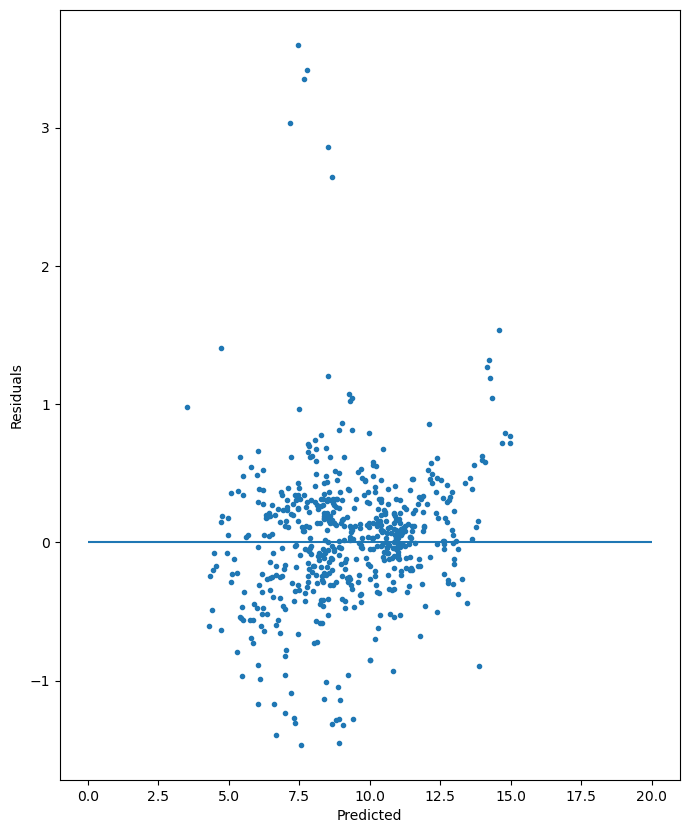

In [204]:
plt.plot(best_svmr_pred_r,Yr_test-best_svmr_pred_r,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [205]:
print("Best MSE : ",best_svmr_mse_r)
print("Best R2 : ",best_svmr_r2_r)
print("CV best_score_: ", svmr_grid_opt_r.best_score_)

Best MSE :  0.2982766434489663
Best R2 :  0.9470603361390937
CV best_score_:  0.9467049762118466


For the optimal SVM model, we observe a similar trend to that of the KNN on the residual plot. Coupled with the better MSE and R-squared values indicates that it is also performing better than the linear models.

#### Optimal tree (CART)

Optimal trees, or decision trees, use the CART algorithm for its regression. The CART algorithm is a nonparametric method that creates decision rules from the given dataset. We will see that it is easy to interpret and the prediction of new values can be seen as a long list of if loops. 

The parametes we chose by cross validation of the decision tree regressor is the max depth of the tree and the complexity parameter used for pruning. The max depth parameter makes sure we do not overfit our model. The length and the complecity parmeter controls the complexity of the tree.

Best score = 0.028320, Best parameters = {'ccp_alpha': 0.001, 'max_depth': 9}


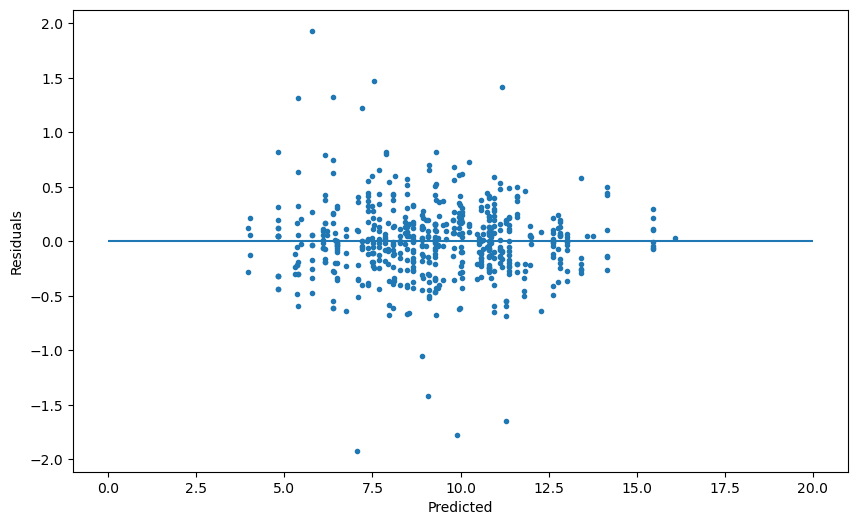

In [206]:
dtr_params = {"max_depth":list(range(2,10,1)), "ccp_alpha" : [0.001,0.01,0.05,1]} 
dtr_grid = GridSearchCV(DecisionTreeRegressor(), param_grid=dtr_params, cv=10)
dtr_grid_opt = dtr_grid.fit(Xr_train, Yr_train)
best_dtr_model = dtr_grid_opt.best_estimator_
best_dtr_pred = dtr_grid_opt.predict(Xr_test)
best_dtr_mse = mean_squared_error(Yr_test, best_dtr_pred)
best_dtr_r2 = r2_score(Yr_test, best_dtr_pred)

print("Best score = %f, Best parameters = %s" % (1.-dtr_grid_opt.best_score_,dtr_grid_opt.best_params_))

plt.figure(figsize=(10, 6)) 
plt.plot(best_dtr_pred,Yr_test-best_dtr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

A clear pattern can be observed in the residual plot. This is because multiple observations fall under the same leaf after the final stage, resulting in the same predictions.

Next we will plot a visual representation of the tree.

##### Full tree: 

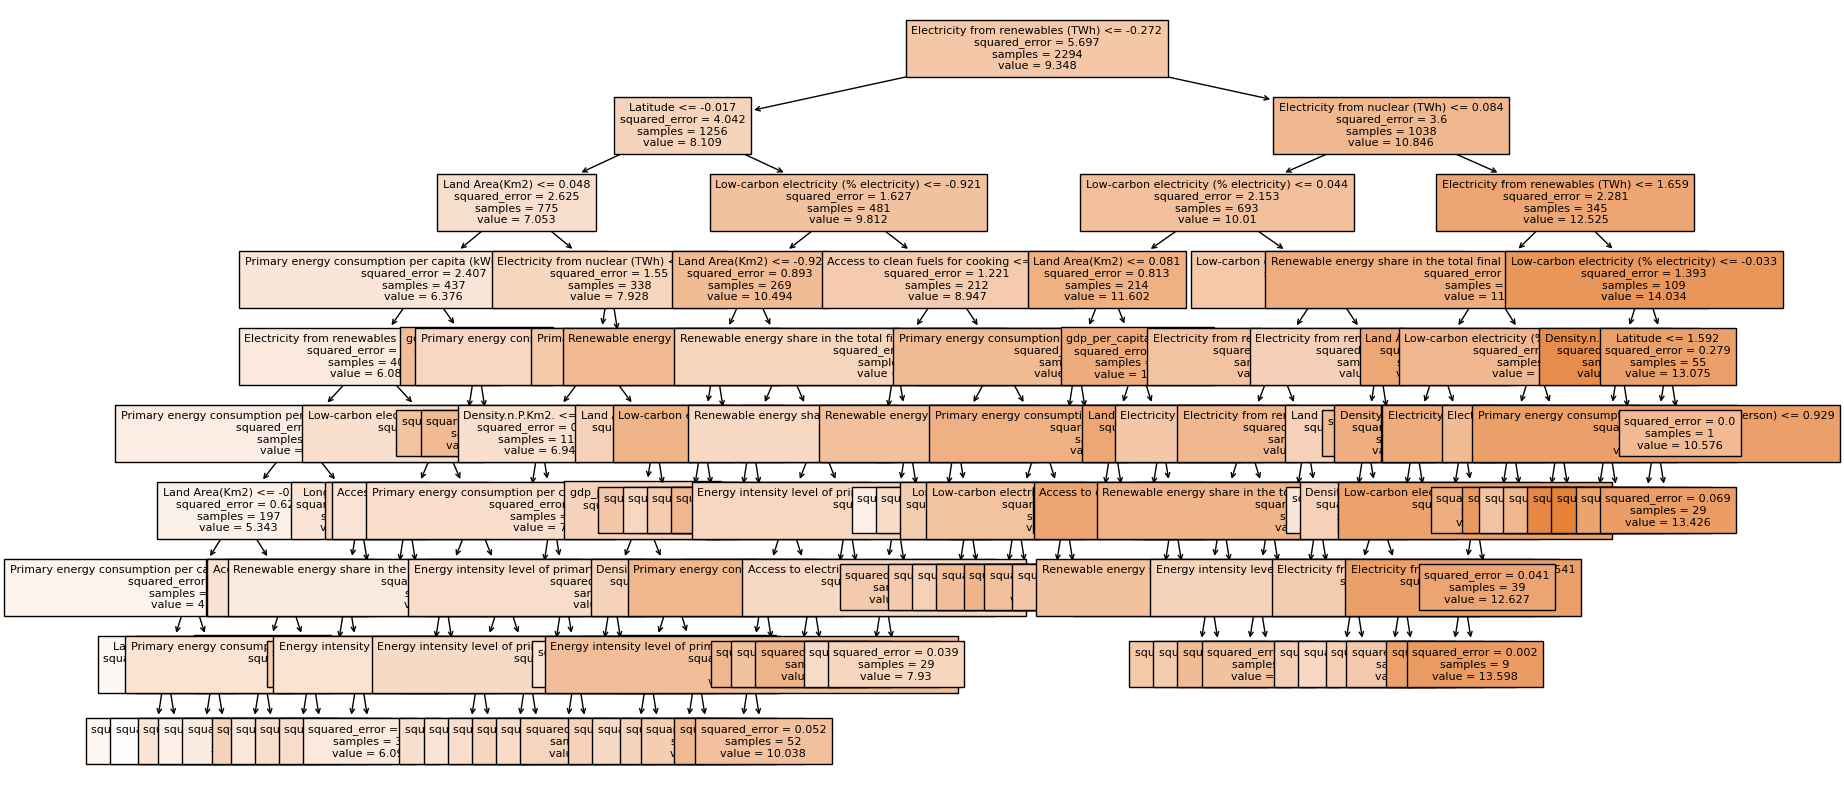

In [207]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtr_model, filled=True, feature_names=dfC.columns.tolist(), fontsize=8)
plt.show()

##### Top 4 layers:

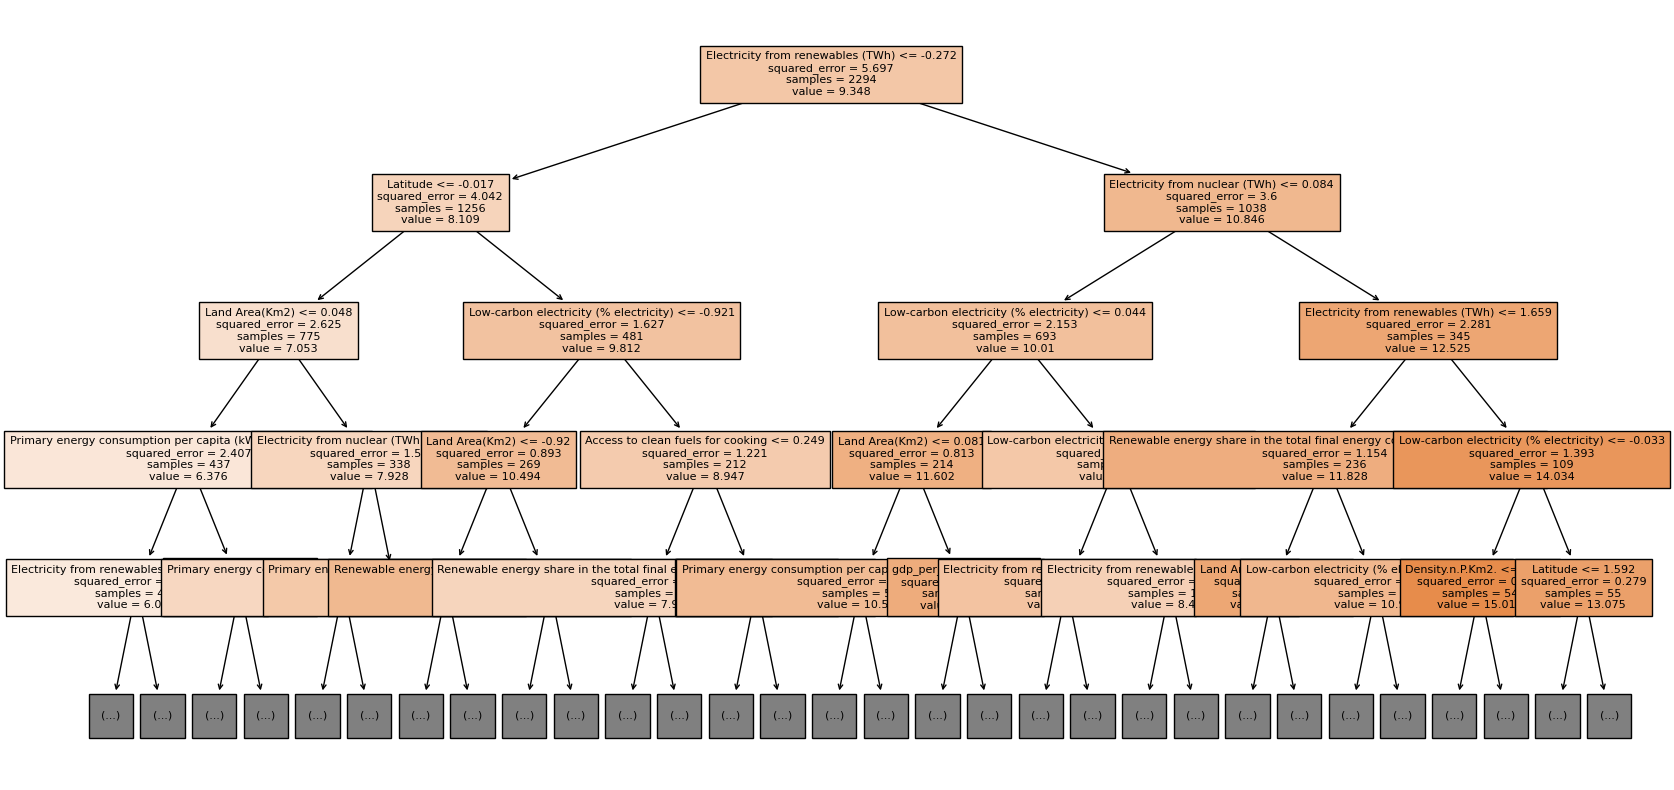

In [208]:
plt.figure(figsize=(20, 10))
plot_tree(best_dtr_model, filled=True, feature_names=dfC.columns.tolist(), fontsize=8, max_depth=4)
plt.show()


In [209]:
print("Best MSE : ",best_dtr_mse)
print("Best R2 : ",best_dtr_r2)
print("CV best_score_: ", dtr_grid_opt.best_score_)

Best MSE :  0.12276630710469434
Best R2 :  0.9782108080726096
CV best_score_:  0.9716804454826924


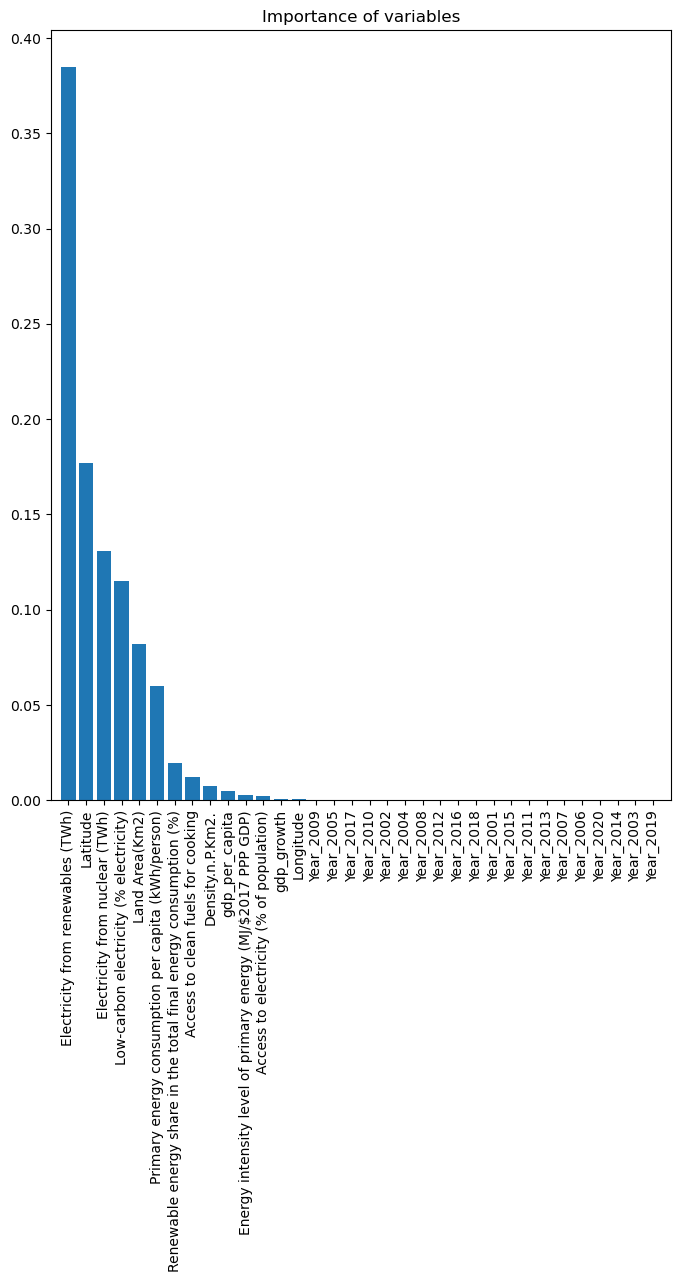

In [210]:
dt= DecisionTreeRegressor(max_depth=9)
dtFit=dt.fit(Xr_train, Yr_train)

importances = dtFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xr_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]),  dfC.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

From the above plot we can see that the most important variable used in the regression is Electricity form renewables (TWh), twice as important as the second most important variable Latitude. None of the Year variables are important to the regression model.

With this knowladge, and from the printed tree further above, we can deduce that electricity from nuclear and renewables have a high impact on whether a country emits a lot of $CO_2$ in a given year. On the contrary, if a country is on the southern hemisphere (low latitude), has low energy production, low energy consumption and a small land area, it is likely to emit less $CO_2$.

#### Random forest

The random forest regressor uses binary decision trees and bagging (bootstrap aggregation). In addition, it introduces randomness to the model which makes it more independent and improves the prediction accuracy. The algorithm works as follows: for each bootstrap sample, a decision tree is estimated, the randomisation takes place in the selection of predictors used in each stage of the construction of the tree. When all of the estimators are made, a mean estimate is calculated of all the values predicted by all the trees in the forest.   

The parameters optimised in the grid search are n_estimators and max_features. n_estimators is the number of trees estimated for each bootstrap. max_features is the maximum number of variables chosen randomly for each node. These two variables help to control the balance between complexity and performance of the final model, i.e. makes sure the model is not overfitted, but sill insures accuracy. 

Best score = 0.004114, Best parameters = {'max_features': 9, 'n_estimators': 500}


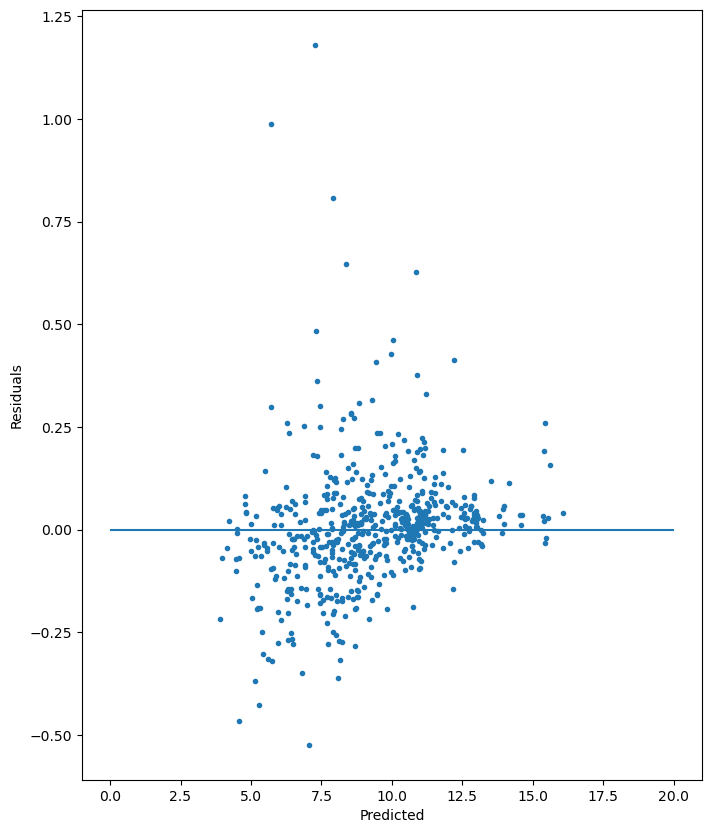

In [211]:
rfr_params =[{"max_features":list(range(2,10,1)), "n_estimators": [100,300,500]}]
rfr_grid = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params, cv=10)
rfr_grid_opt=rfr_grid.fit(Xr_train, Yr_train)
best_rfr_model = rfr_grid.best_estimator_
best_rfr_pred = rfr_grid_opt.predict(Xr_test)
best_rfr_mse = mean_squared_error(Yr_test, best_rfr_pred)
best_rfr_r2 = r2_score(Yr_test, best_rfr_pred)

print("Best score = %f, Best parameters = %s" % (1.-rfr_grid_opt.best_score_,rfr_grid_opt.best_params_))

plt.plot(best_rfr_pred,Yr_test-best_rfr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [212]:
print("MSE : ",best_rfr_mse)
print("R2 : ",best_rfr_r2)
print("CV best_score_: ", rfr_grid_opt.best_score_)

MSE :  0.022357463029395595
R2 :  0.9960318831408557
CV best_score_:  0.9958860487514869


We se a clear improvment of the residuals, and the MSE and the $R^2$ form the decision tree model to this random forest model. 

##### Importance of variables in the optimised model :

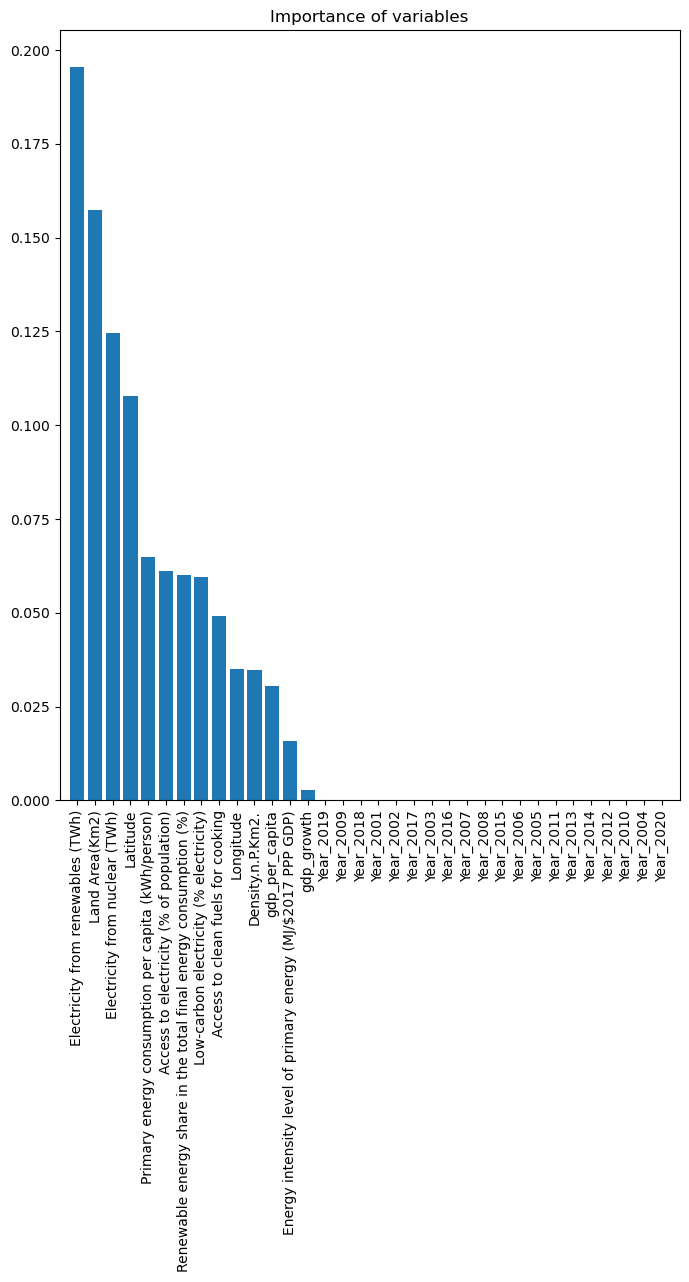

In [213]:
rf= RandomForestRegressor(n_estimators=500,max_features=9)
rfFit=rf.fit(Xr_train, Yr_train)

importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xr_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]),  dfC.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

From the above plot we can see that the most important variables used in the random forest regression are Electricity form renewables (TWh) and Land Area (Km2). Similarly to the decision tree regressor, none of the Year variables are important to the regression model. In contrast to the decision tree model, in this model several of the variables are equally important to the model, and one is not much more important than the others as in the decision tree model.

#### Boosting

In addition to reducing the variance (like in bagging), aggregation by boosting allows to also reduce thh bias in the model. To make a regression model using boosting we will preform a gradiant boosting model (GBM). In this regression model regression trees are used to calculate the gardient of the loss function we want to reduce. 

The parameters optimised for the model is  n_estimators, learning_rate, and max_depth. n_estimators is the number of boosting stages to calculate. High values can lead to overfitting but can also reduce the training error. The learning rate is used to shrink the weight of each trees in the algorithm used in shinkage methods to avoid overfitting. 

Best score = 0.006053, Best parameters = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


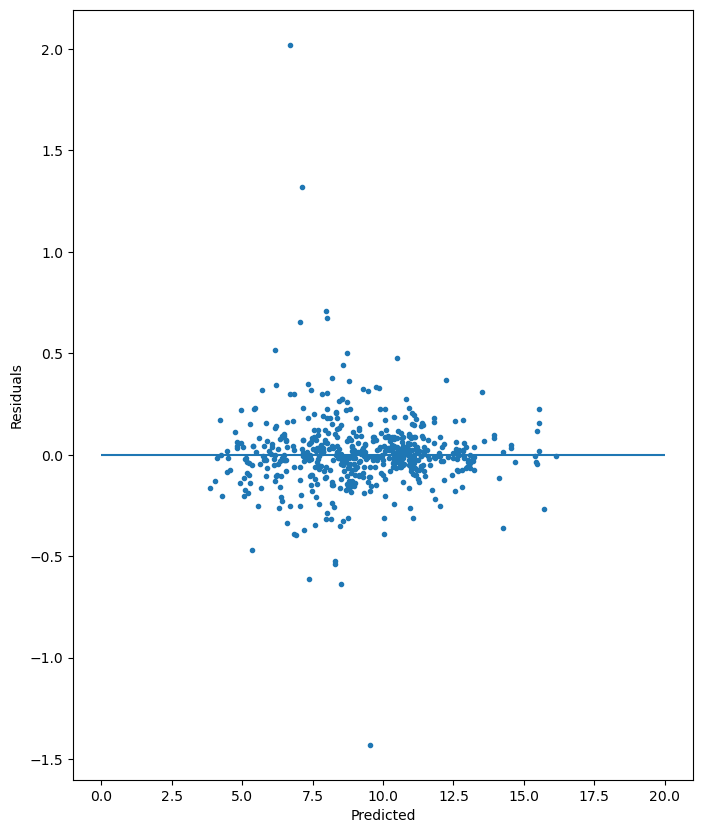

In [214]:
gbr_params = {'n_estimators': [100,300,500], 'learning_rate': [0.01, 0.1,0.2, 0.5], 'max_depth': [3, 5, 7]}
gbr_grid = GridSearchCV(GradientBoostingRegressor(n_iter_no_change=10), param_grid=gbr_params, cv=10)
gbr_grid_opt = gbr_grid.fit(Xr_train, Yr_train)
best_gbr_model = gbr_grid_opt.best_estimator_
best_gbr_pred = gbr_grid_opt.predict(Xr_test)
best_gbr_mse = mean_squared_error(Yr_test, best_gbr_pred)
best_gbr_r2 = r2_score(Yr_test, best_gbr_pred)

print("Best score = %f, Best parameters = %s" % (1.-gbr_grid_opt.best_score_,gbr_grid_opt.best_params_))

plt.plot(best_gbr_pred,Yr_test-best_gbr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [215]:
print("MSE : ",best_gbr_mse)
print("R2 : ",best_gbr_r2)
print("CV best_score_: ", gbr_grid_opt.best_score_)

MSE :  0.03595142131351998
R2 :  0.9936191579144372
CV best_score_:  0.993946544684101


##### Without early stopping (n_iter_no_change): 
- Best score = 0.004775 
- Best parameters = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}
- Running time ca 30 min
- MSE :  0.03209506439588834
- R2 :  0.9939706427648183

##### With early stopping (n_iter_no_change): 
- Best score = 0.005465, Best parameters = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
- Running time 15 min
- MSE :  0.038615229966774335
- R2 :  0.9927457688410743

We dont see much change in MSE and R2 (without early stopping gives a smaller MSE and bigger $R^2$, but the difference is really small). The same values for learning rate and max_depth are chosen. We use early stopping to reduce computation time.  

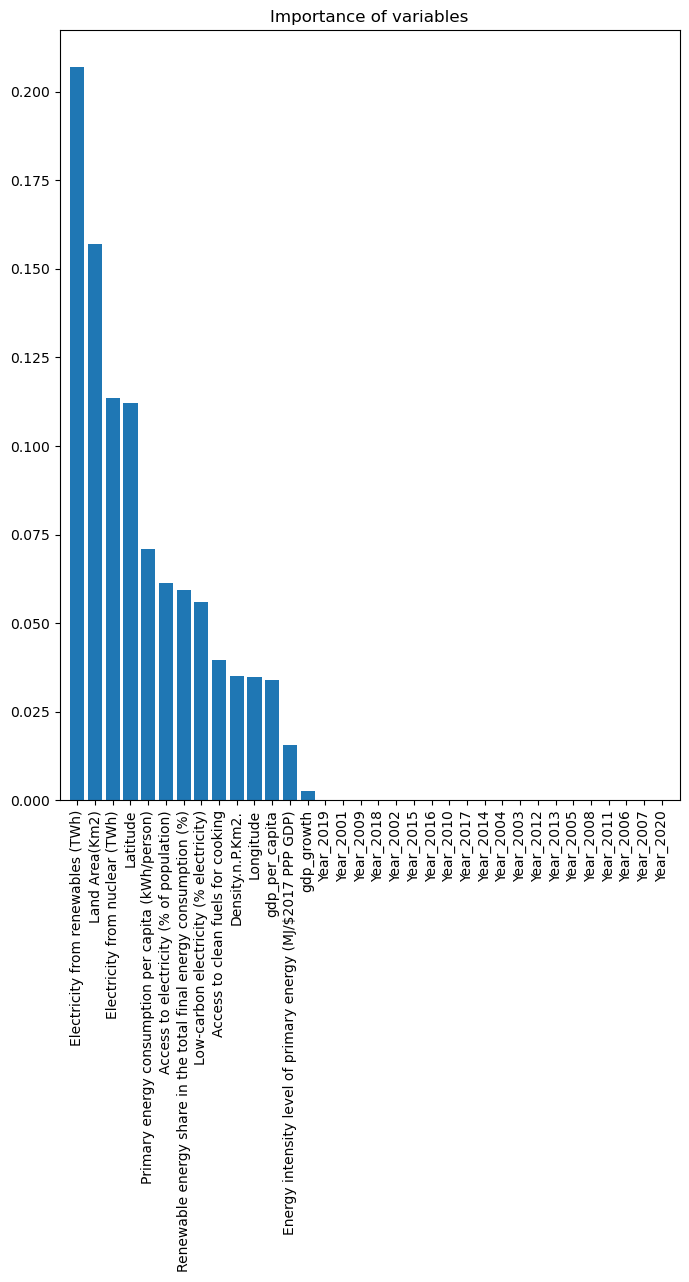

In [216]:
gb= GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,max_depth=7)
gbFit=rf.fit(Xr_train, Yr_train)

importances = gbFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xr_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]),  dfC.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

#### Neural networks

In this version of a neural network algorithm, we use the default adaptive learning rate optimisation algorithm called Adam (Adaptive moments). We also use RELU, the default activation function, as activation function for the hidden layer of the network. In a further study, we could change this activation function to use other activation functions.

The only parameters we optimise by cross validation is the number of hidden layers to use in the final model, and the decay alpha. We set the max number of iterations to 10000 (as it did not often converge using 500).

For batch_size we use the default min(200, n_samples).

/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vilde

Best score = 0.025758, Best parameters = {'alpha': 1, 'hidden_layer_sizes': (30,)}


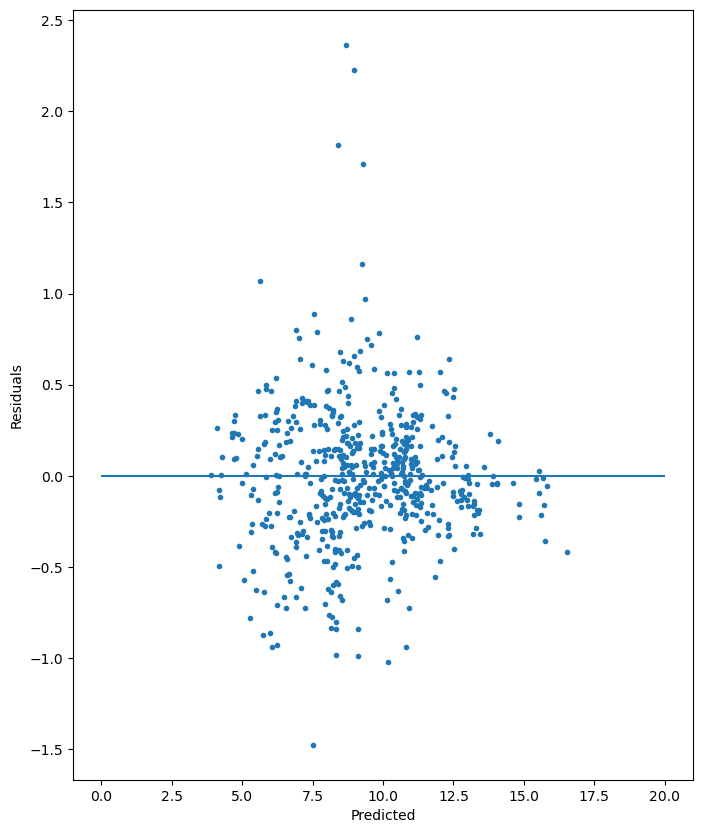

In [242]:
nnr_params = [{"hidden_layer_sizes":list([(6,),(8,),(10,),(20,),(30,)]), "alpha":[0.00001,0.001,0.1,1,2]}] #list([(5,),(6,),(7,),(8,),(9,),(10,)]) 
#nnr_params = [{"hidden_layer_sizes":list([(30,)]), "alpha":[0.2]}]
nnr_grid = GridSearchCV(MLPRegressor(max_iter=1000),nnr_params,cv=10,n_jobs=-1)
nnr_grid_opt = nnr_grid.fit(Xr_train, Yr_train)
best_nnr_model = nnr_grid_opt.best_estimator_
best_nnr_pred = nnr_grid_opt.predict(Xr_test)
best_nnr_mse = mean_squared_error(Yr_test, best_nnr_pred)
best_nnr_r2 = r2_score(Yr_test, best_nnr_pred)

print("Best score = %f, Best parameters = %s" % (1.-nnr_grid_opt.best_score_,nnr_grid_opt.best_params_))

plt.plot(best_nnr_pred,Yr_test-best_nnr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

In [243]:
print("MSE : ",best_nnr_mse)
print("R2 : ",best_nnr_r2)
print("CV best_score_: ", nnr_grid_opt.best_score_)

MSE :  0.1458666619333874
R2 :  0.9741108389782883
CV best_score_:  0.9742423580755564


##### Without early stopping: 
- Best score = 0.048479
- Best parameters = {'hidden_layer_sizes': (10,)}
- MSE :  0.26815484800868
- R2 :  0.9496246104059128
- 3 min runtime

##### With early stopping: nmax=1000
- Best score = 0.076625
- Best parameters = {'hidden_layer_sizes': (10,)}
- MSE :  0.3950967658523832
- R2 :  0.9257773870024033
- 3 min runtime

We se that the MSE is better when we do not use early stopping, but the convergence is worse.

We keep the results not using early stopping. 

### Question 3 : Comparing the models

Let's now compare the different regression models using the MSE and the $R^2$ coefficients :

In [244]:
mse_dict = {
    "Linear regression": lr_mse,
    "Ridge": best_ridge_mse,
    "Lasso": best_lasso_mse,
    "KNN": best_knnr_mse,
    "Support Vector Machine model": best_svmr_mse_r,
    "Optimal tree model": best_dtr_mse,
    "Random forest model": best_rfr_mse,
    "Boosting model": best_gbr_mse,
    "Neural network model": best_nnr_mse
}

sorted_mse = sorted(mse_dict.items(), key=lambda x: x[1])
print("Mean Squared Error for the regression models: \n")
for model, mse in sorted_mse:
    print(model + ":", mse)


Mean Squared Error for the regression models: 

Random forest model: 0.022357463029395595
KNN: 0.03197789759318346
Boosting model: 0.03595142131351998
Optimal tree model: 0.12276630710469434
Neural network model: 0.1458666619333874
Support Vector Machine model: 0.2982766434489663
Lasso: 0.8172415294707983
Linear regression: 0.8291353761997012
Ridge: 0.8296571168477556


According to the MSE the best models are randomforest, knn and boosting. They all have a mean squared error smaller than 0.4, which means that they are the predicted values are close/almost equal to the real values. 

In [245]:
r2_dict = {
    "Linear regression": lr_r2,
    "Ridge": best_ridge_r2,
    "Lasso": best_lasso_r2,
    "KNN": best_knnr_r2,
    "Support Vector Machine model": best_svmr_r2_r,
    "Optimal tree model": best_dtr_r2,
    "Random forest model": best_rfr_r2,
    "Boosting model": best_gbr_r2,
    "Neural network model": best_nnr_r2
}

sorted_r2 = sorted(r2_dict.items(), key=lambda x: x[1], reverse=True)
print("R2 for the regression models: \n")
for model, r2 in sorted_r2:
    print(model + ":", r2)


R2 for the regression models: 

Random forest model: 0.9960318831408557
KNN: 0.9943243992221896
Boosting model: 0.9936191579144372
Optimal tree model: 0.9782108080726096
Neural network model: 0.9741108389782883
Support Vector Machine model: 0.9470603361390937
Lasso: 0.854951794538484
Linear regression: 0.8528408138040874
Ridge: 0.8527482126060479


We see here the same order of best models (randomforest, then knn, then boosting). They all have a $R^2$ bigger than 0.99, this means that the models explaine the data well and are well adjusted to the data. 

#### Visual representation of residuals for all of the different regression models

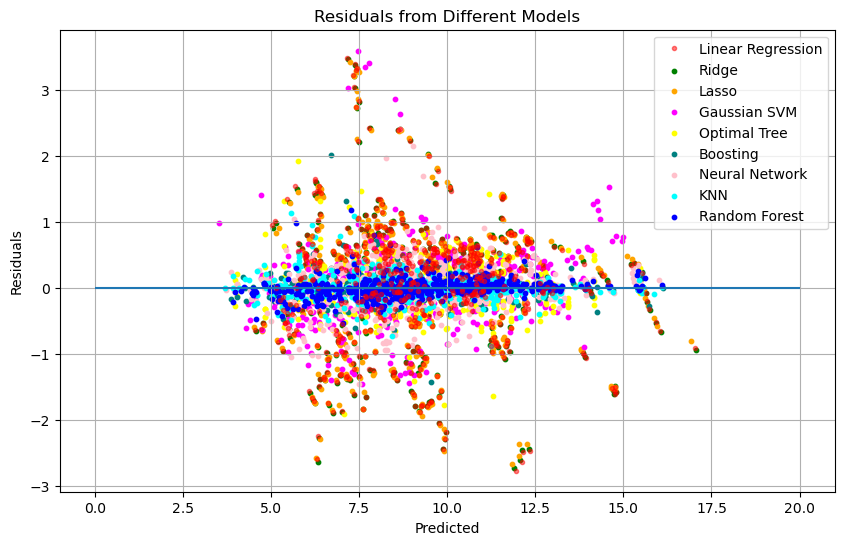

In [221]:
plt.figure(figsize=(10,6))
plt.plot(lr_pred,Yr_test-lr_pred, ".", color="red", label="Linear Regression", alpha=0.5)
plt.scatter(best_ridge_pred,Yr_test-best_ridge_pred, color="green", label="Ridge",s=10)
plt.scatter(best_lasso_pred,Yr_test-best_lasso_pred, color="orange", label="Lasso",s=10)
plt.scatter(best_svmr_pred_r,Yr_test-best_svmr_pred_r, color="magenta", label="Gaussian SVM",s=10)
plt.scatter(best_dtr_pred,Yr_test-best_dtr_pred, color="yellow", label="Optimal Tree",s=10)
plt.scatter(best_gbr_pred,Yr_test-best_gbr_pred, color="teal", label="Boosting",s=10)
plt.scatter(best_nnr_pred,Yr_test-best_nnr_pred, color="pink", label="Neural Network",s=10)
plt.scatter(best_knnr_pred,Yr_test-best_knnr_pred, color="cyan", label="KNN",s=10)
plt.scatter(best_rfr_pred,Yr_test-best_rfr_pred, color="blue", label="Random Forest",s=10)

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.title("Residuals from Different Models")
plt.legend(loc="upper right")
plt.grid()

plt.show()


The above plot shows how the residuals for random forest are generally smaller than for the other models. KNN is also better than many of the other ones. We notice that the linear models (linear regression, Ridge and Lasso) have quite similar residuals, and are often overlaid on the plot.


We conclude, from the MSE and the $R^2$ coefficient, that the best model is the random forest model. (it is a model that generaly preforms well in machine learning, which we confim here)

### Question 4 : Interpretations

We found in the previous question that the random forest model best predicted the variable 'Value_co2_emissions_kt_by_country'. Let's now compare it to the interpretations we made in our uni and multidimensional analysis. 

In the first part of this project, we found that there is not a big dependency between the variable Year and Value_co2_emissions_kt_by_country (Question 8). This can also be observed when we look at the importance of variables in different regression models (see plot underneath).

Variables we found were important in the making of the regression model where Electricity from renewables (TWh), Land Area (Km2) and Electricity from nuclear (TWh). We found in question 6 that electricity from renewables and electricity from nuclear was positively correlated with the $CO_2$ emissions, electricity from renewables more than electricity from nuclear, this is coherent with what we found when predicting the $CO_2$ emissions. The same can be said for the 'Land Area' variable.

In the PCA analysis we found that the most positively correlated varables to dimension 1 was 'Access to clean fuels for cooking', 'Access to electricity (% of population)', 'Primary energy consmption per capita' and 'gdp per capita'. The possible interpretation was that these were the variables corresponding to countries that are developed. When comparing to the most important  variables in the random forest model, we observe that the variables corresponding to dimension 2 are the most contributing to 'Value_co2_emissions_kt_by_country' (namely production of energy and land area). The machine learning regression models try to explain what variables contribute the most to emitting $CO_2$. This could imply that countries that behave like dimension 2 emit the most $CO_2$. The difference between dimension 2 and the random forest explication is that latitude is highly correlated to emitting $CO_2$, meaning countries in the northern hemisphere tend to emit more $CO_2$. 

The other variables that contribute significantly to explain 'Value_co2_emissions_kt_by_country' according to random forest  are: "Primary energy consumption", "Low carbon electricity", "Access to electricity" and "Renewable energy share". They partly correspond to the dimension 1 of the PCA, which could imply that developed countries also emit significant amounts of $CO_2$. 

In conclusion, we can deduce that developed countries and countries that are producers of energy are the ones that emit the most $CO_2$. We saw in the first part that.
- Top 5 emitting countries: China, United States, India, Japan, Germany
- Bottom 5 emitting countries: South Sudan, Djibouti, Somalia, Nauru, Eritrea

Which corresponds globally to our findings as the top emitting countries have high land area, are globally developed, in the northern hemisphere and produce energy.

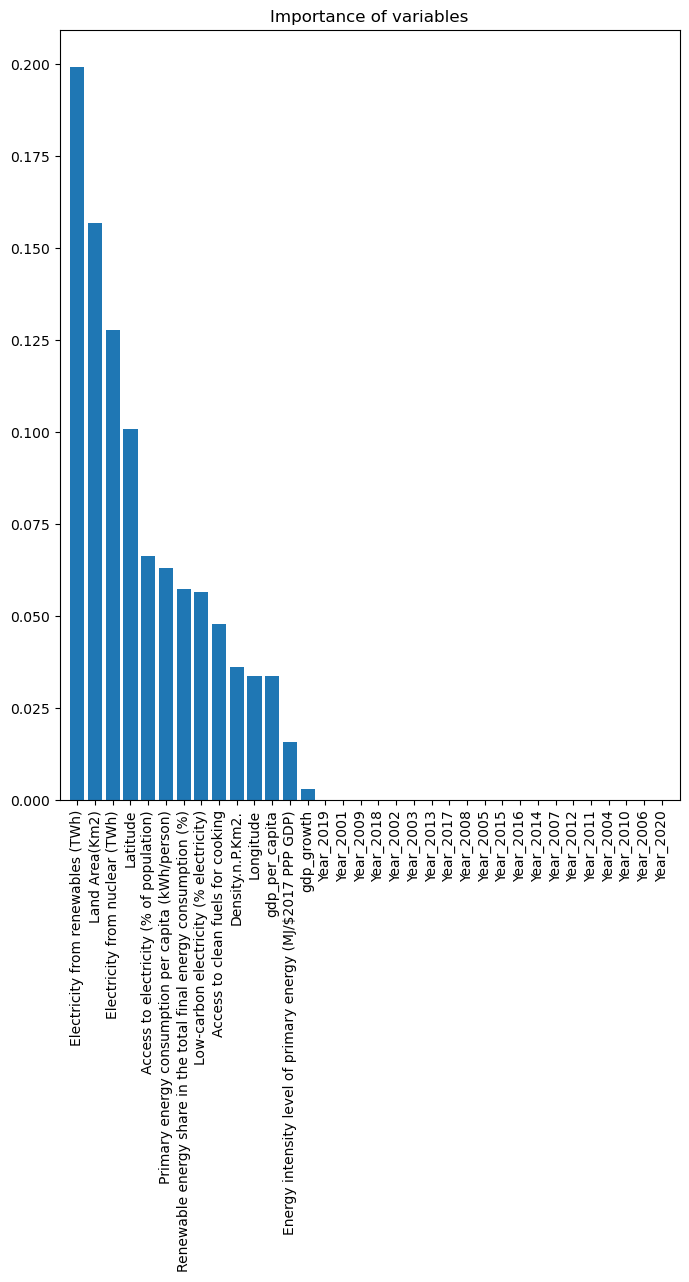

In [246]:
rf= RandomForestRegressor(n_estimators=500,max_features=9)
rfFit=rf.fit(Xr_train, Yr_train)

importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xr_train.shape[1]):
#    print(dfC.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1]), importances[indices])
plt.xticks(range(Xr_train.shape[1]),  dfC.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

### Question 5 : MissForest

In this last section we will fill the missing values from the original dataset with imputed values using missForest.

In [223]:
# Importing data with missing values

naData = pd.read_csv(path + "global-data-on-sustainable-energy (1).csv")

naData['Entity'] = naData['Entity'].astype('category')
naData['Year'] = naData['Year'].astype('category')
naData.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True)
naData['Density.n.P.Km2.'] = pd.to_numeric(naData['Density.n.P.Km2.'].str.replace(',', '.'))

naData = naData.drop(columns=columns_to_remove)

In [224]:
# data with missing values 
naData.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [225]:
naDataDum=pd.get_dummies(naData[["Year"]], drop_first= True) 

naDataQuant=naData[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]
na_dfC=pd.concat([naDataDum,naDataQuant],axis=1)
na_dfC.head()

,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,0,0,0,0,0,0,0,0,0,0,...,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,1,0,0,0,0,0,0,0,0,0,...,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,0,1,0,0,0,0,0,0,0,0,...,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,0,0,1,0,0,0,0,0,0,0,...,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,0,0,0,1,0,0,0,0,0,0,...,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


#### Reminder of the amount of missing data

In [226]:
nrows = len(naDataQuant)
missing_rates = 1-naDataQuant.count(axis=0)/nrows
missing_rates

Access to electricity (% of population)                             0.002740
Access to clean fuels for cooking                                   0.046314
Renewable energy share in the total final energy consumption (%)    0.053165
Electricity from nuclear (TWh)                                      0.034530
Electricity from renewables (TWh)                                   0.005755
Low-carbon electricity (% electricity)                              0.011510
Primary energy consumption per capita (kWh/person)                  0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.056728
Value_co2_emissions_kt_by_country                                   0.117292
gdp_growth                                                          0.086873
gdp_per_capita                                                      0.077281
Density.n.P.Km2.                                                    0.000274
Land Area(Km2)                                                      0.000274

<Axes: >

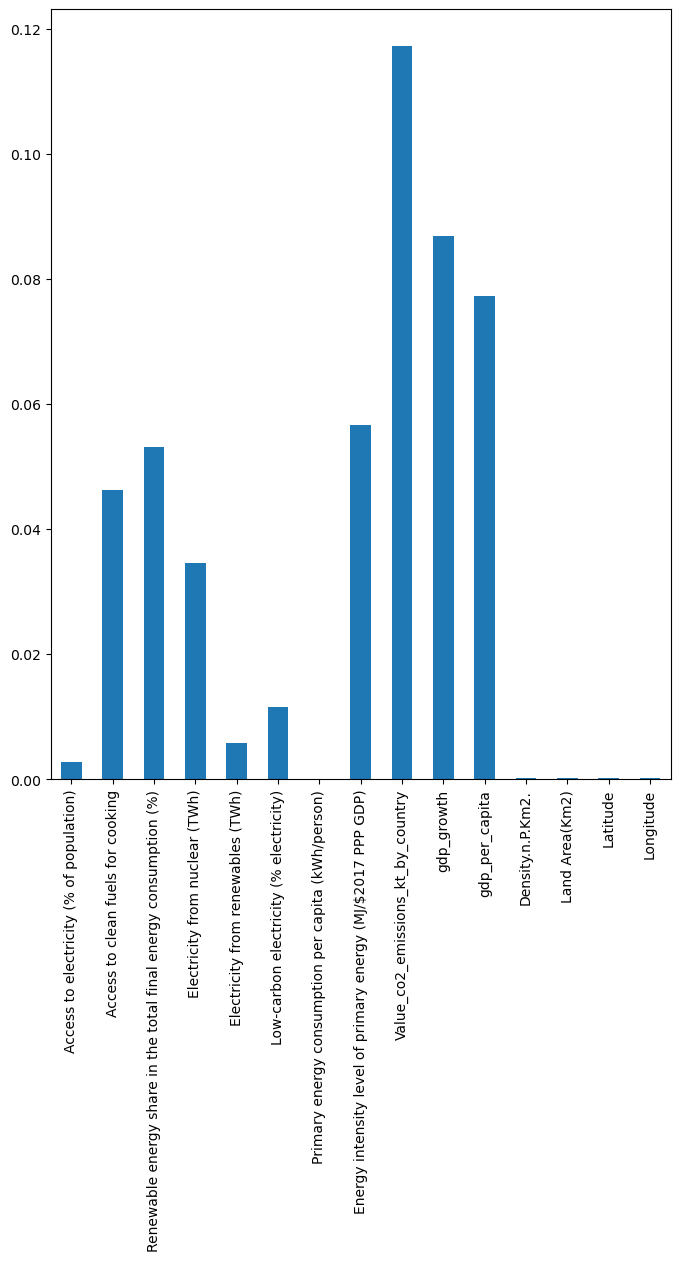

In [227]:
missing_rates.plot.bar()

Value_co2_emissions_kt_by_country has the highest amount of missing data. It is also the variable we are seaking to predict.

#### Imputation using missForest

In [228]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

##### Imputations in the dataset data_rf using missForest :

In [229]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
data_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=100).fit_transform(naDataQuant)

/Users/vildeopdal/anaconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


##### Data after imputation

In [230]:
data_rfImp=pd.DataFrame(data_rf, columns=naDataQuant.columns)
data_rfImp.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,7.120463,351.783341,60.0,652230.0,33.93911,67.709953
1,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,4.630912,253.757463,60.0,652230.0,33.93911,67.709953
2,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,6.098914,179.426579,60.0,652230.0,33.93911,67.709953
3,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [231]:
# data with nan
naDataQuant.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,1.613591,6.2,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,4.074574,7.2,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,9.409158,8.2,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,14.738506,9.5,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,20.064968,10.9,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [232]:
# data with removed nan
dataQuant.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,3.839076,3.082207,36.66,0.0,0.793725,67.021280,5.437941,1.40,8.832278,5.250617,60.0,13.388153,33.93911,67.709953
1,4.479394,3.301515,44.24,0.0,0.748331,62.921350,5.319253,1.20,1.414118,5.353667,60.0,13.388153,33.93911,67.709953
2,5.038938,3.492850,33.88,0.0,0.768115,63.440857,5.529703,1.41,11.229715,5.489067,60.0,13.388153,33.93911,67.709953
3,5.542444,3.721559,31.89,0.0,0.800000,76.190475,5.718411,1.50,5.357403,5.574940,60.0,13.388153,33.93911,67.709953
4,6.004249,3.911521,28.78,0.0,0.866025,78.947370,5.870087,1.53,13.826320,5.885251,60.0,13.388153,33.93911,67.709953


#### Prevision with imputated data

In [233]:
data_rfImp_pred=data_rfImp[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]

dfCImp=pd.concat([naDataDum,data_rfImp_pred],axis=1)
dfCImp.head()

,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land Area(Km2),Latitude,Longitude
0,0,0,0,0,0,0,0,0,0,0,...,0.31,65.957440,302.59482,1.64,7.120463,351.783341,60.0,652230.0,33.93911,67.709953
1,1,0,0,0,0,0,0,0,0,0,...,0.50,84.745766,236.89185,1.74,4.630912,253.757463,60.0,652230.0,33.93911,67.709953
2,0,1,0,0,0,0,0,0,0,0,...,0.56,81.159424,210.86215,1.40,6.098914,179.426579,60.0,652230.0,33.93911,67.709953
3,0,0,1,0,0,0,0,0,0,0,...,0.63,67.021280,229.96822,1.40,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,0,0,0,1,0,0,0,0,0,0,...,0.56,62.921350,204.23125,1.20,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


In [234]:
# Transformation des donnees - sqrt / log 
#Transformation of variables
#WARNING: Only run ONCE!!

epsilon=0.000001
dfCImp['Access to electricity (% of population)'] = np.sqrt(dfCImp['Access to electricity (% of population)']+epsilon)
dfCImp["Access to clean fuels for cooking"] = np.sqrt(dfCImp["Access to clean fuels for cooking"]+epsilon)

dfCImp["Electricity from nuclear (TWh)"] = np.sqrt(dfCImp["Electricity from nuclear (TWh)"]+epsilon)
dfCImp["Electricity from renewables (TWh)"] = np.sqrt(dfCImp["Electricity from renewables (TWh)"]+epsilon)


dfCImp["Primary energy consumption per capita (kWh/person)"] = np.log(dfCImp["Primary energy consumption per capita (kWh/person)"]+epsilon)
dfCImp["gdp_per_capita"] = np.log(dfCImp["gdp_per_capita"]+epsilon)
dfCImp["Land Area(Km2)"] = np.log(dfCImp["Land Area(Km2)"]+epsilon)

In [235]:
data_rfImp["Value_co2_emissions_kt_by_country"] = np.log(data_rfImp["Value_co2_emissions_kt_by_country"])
Yrna=data_rfImp["Value_co2_emissions_kt_by_country"]

Splitting the dataset : 

In [236]:
XnaImp_train,XnaImp_test,Yrna_train,Yrna_test=train_test_split(dfCImp,Yrna,test_size=0.2,random_state=42)

In [237]:
# Scaling 
scaler = StandardScaler()  
scaler.fit(XnaImp_train)  
Xrna_train = scaler.transform(XnaImp_train)  
Xrna_test = scaler.transform(XnaImp_test)

#### Random Forest with imputations

Using the imputated data we will now use the random forest regressor (since it performed best using the old dataset) to predict the value of 'Value_co2_emissions_kt_by_country'.

Best score = 0.005633, Best parameters = {'max_features': 9, 'n_estimators': 300}


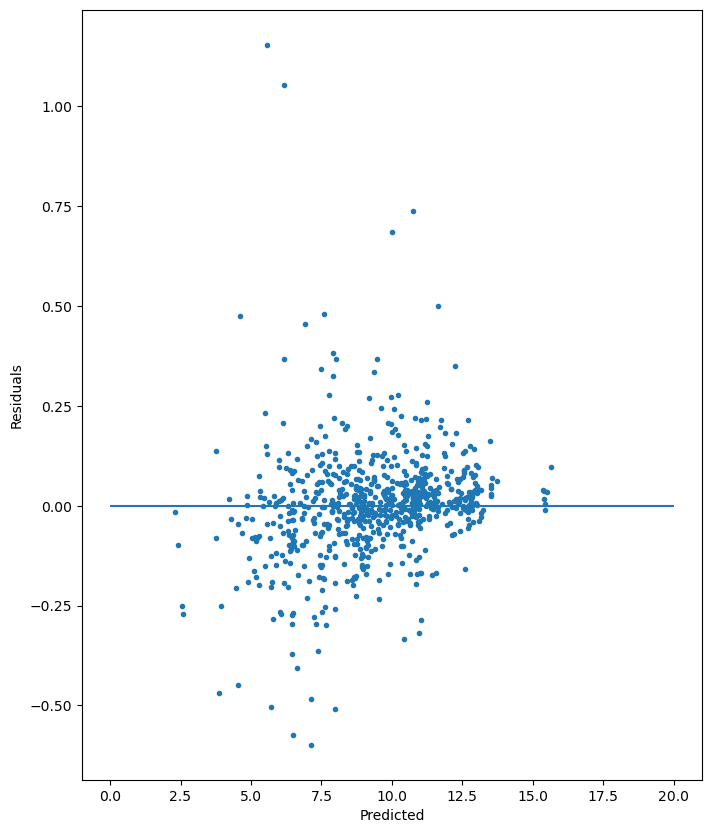

In [238]:
rfr_params_na = [{"max_features":list(range(2,10,1)), "n_estimators": [100,300,500]}]
rfr_grid_na = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params_na, cv=5)
rfr_grid_opt_na=rfr_grid_na.fit(Xrna_train, Yrna_train)
best_rfr_model_na = rfr_grid_na.best_estimator_
best_rfr_pred_na = rfr_grid_opt_na.predict(Xrna_test)
best_rfr_mse_na = mean_squared_error(Yrna_test, best_rfr_pred_na)
best_rfr_r2_na = r2_score(Yrna_test, best_rfr_pred_na)

print("Best score = %f, Best parameters = %s" % (1.-rfr_grid_opt_na.best_score_,rfr_grid_opt_na.best_params_))

plt.plot(best_rfr_pred_na,Yrna_test-best_rfr_pred_na,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

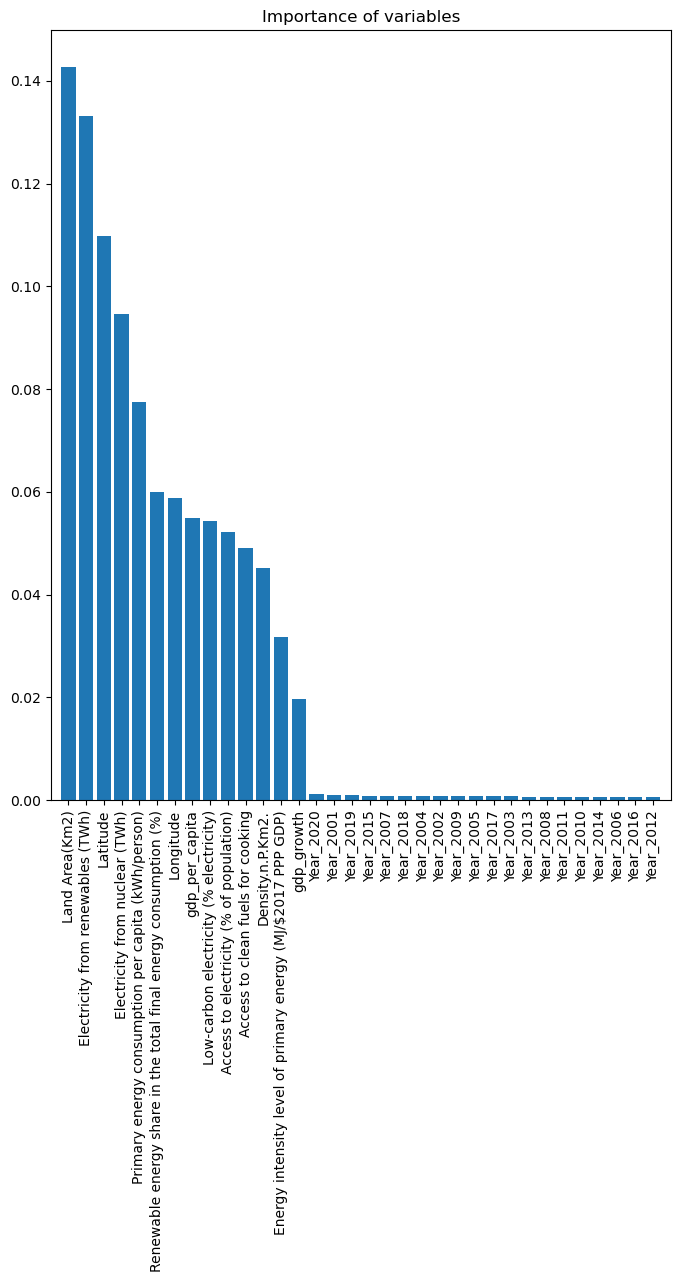

In [239]:
# using the best method found above
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xrna_train, Yrna_train)

importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(Xrna_train.shape[1]):
#    print(dfCImp.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xrna_train.shape[1]), importances[indices])
plt.xticks(range(Xrna_train.shape[1]),  dfCImp.columns[indices])
plt.xticks(rotation=90) 
plt.xlim([-1, Xrna_train.shape[1]])
plt.show()

#### Comparison to prevision with data used originally

In [240]:
print("Mean Squared Error for the regression models:")
print("Random forest model: ", best_rfr_mse)
print("Random forest model with imputations: ", best_rfr_mse_na)

Mean Squared Error for the regression models:
Random forest model:  0.022357463029395595
Random forest model with imputations:  0.0199848310784612


In [241]:
print("R2 for the regression models:")
print("Random forest model: ", best_rfr_r2)
print("Random forest model with imputations: ", best_rfr_r2_na)

R2 for the regression models:
Random forest model:  0.9960318831408557
Random forest model with imputations:  0.9963019074224899


We conclude that the random forest regressor works well on the imputed dataset, even better than the original. This can be because the missForest algorithm is based on random forest which we know works well on our data.

Using the imputed dataset we have a bigger dataset, which means a bigger training and testing set, which leads to better predictions.